In [1]:
# !pip install mediapipe --user

In [2]:
import cv2
import mediapipe as mp
import random
from itertools import count
import time
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits import mplot3d
plt.style.use('fivethirtyeight')

# source code: https://github.com/google/mediapipe/tree/c2a183c4a9e2c214b3b54ba67be098fac727ca25/mediapipe/python

In [3]:
x_values = []
y_values = []
counter = 0
index = count()

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

In [4]:
def process_hand_landmarks(image, y_coord, x_coord, z_coord):
    with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
        # Convert the image to RGB for processing
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Process the image
        results = hands.process(image_rgb)

        # if results.multi_handedness:
            # for handedness in results.multi_handedness:
                # print(handedness.classification[0].label)
                    # print(handedness)
        if results.multi_hand_world_landmarks:
            for hand_world_landmarks in results.multi_hand_landmarks:
                y_coord.append(hand_world_landmarks.landmark[8].y)
                x_coord.append(hand_world_landmarks.landmark[8].x)
                z_coord.append(hand_world_landmarks.landmark[8].z)

        # Check for hand landmarks
        if results.multi_hand_landmarks:

            for hand_landmarks in results.multi_hand_landmarks:
                # Draw the landmarks on the image
                # y_coord.append(hand_landmarks.landmark[8].y)
                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    return y_coord, x_coord, z_coord

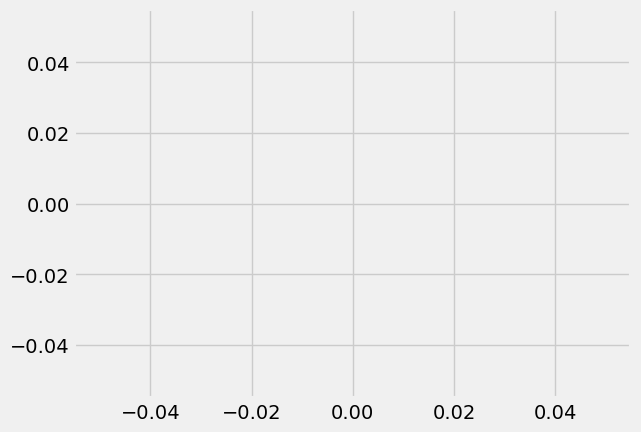

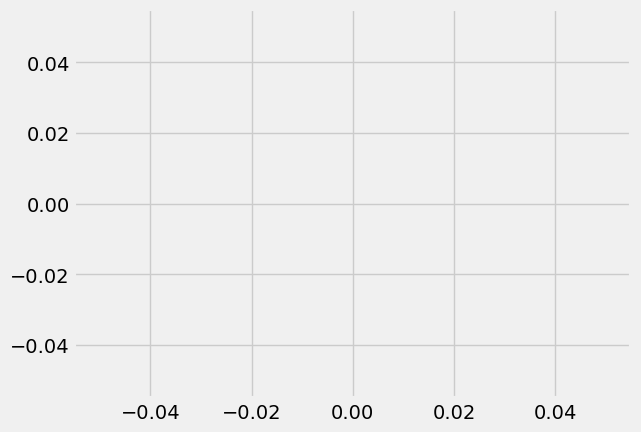

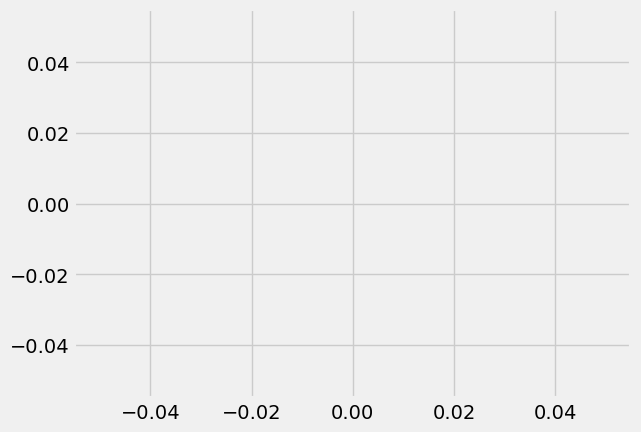

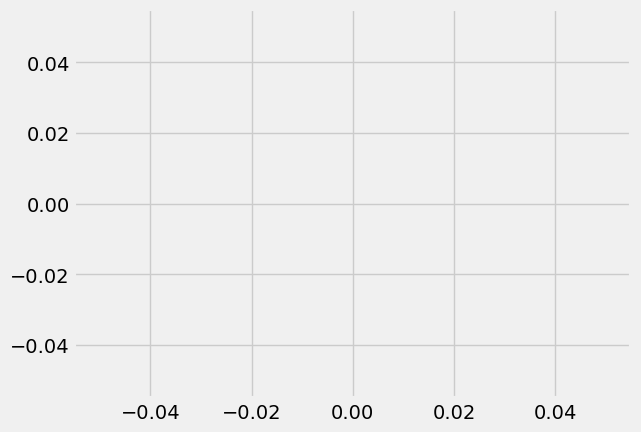

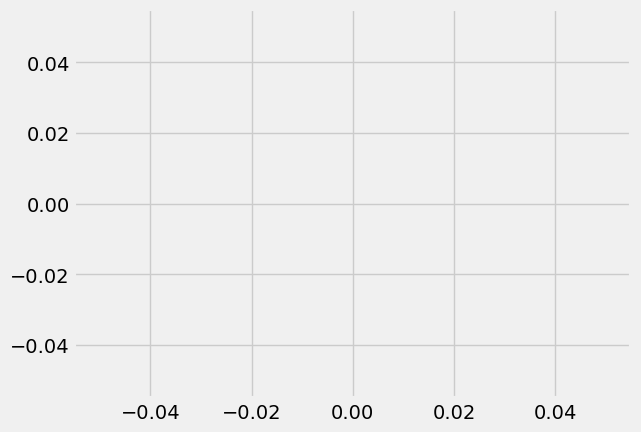

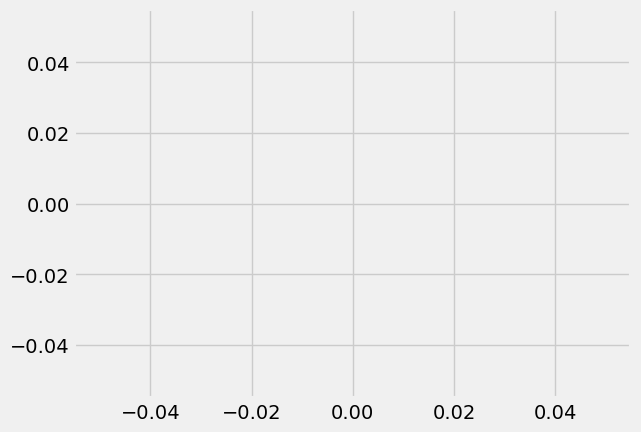

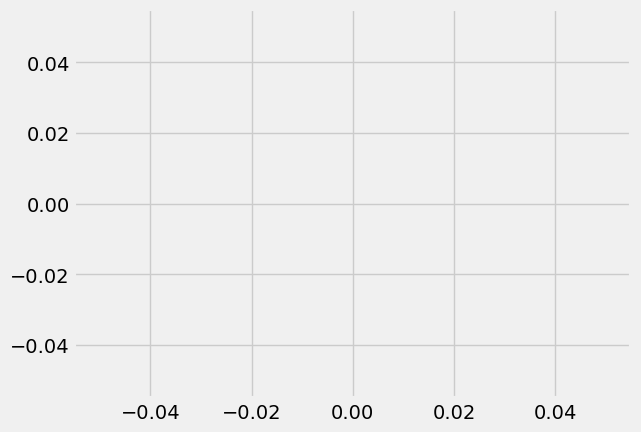

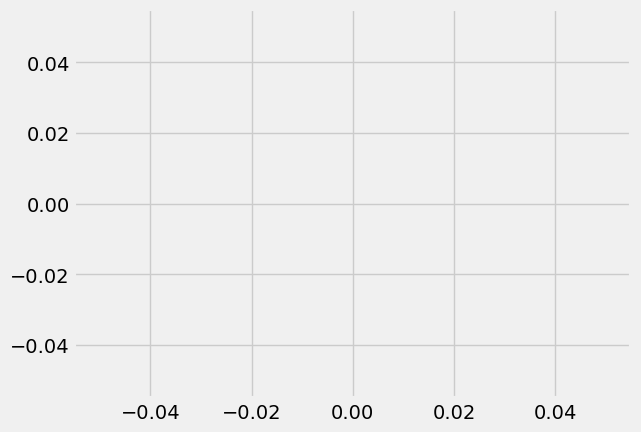

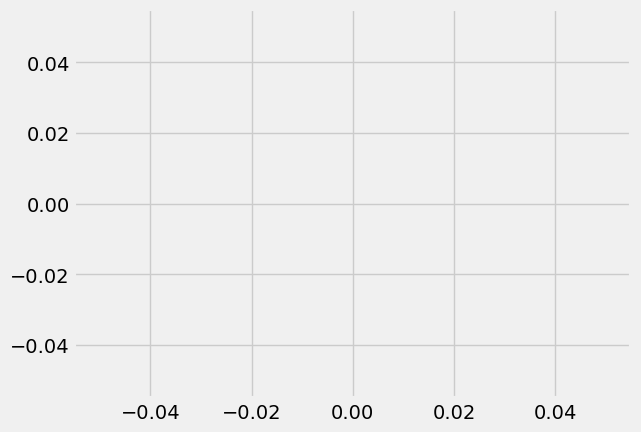

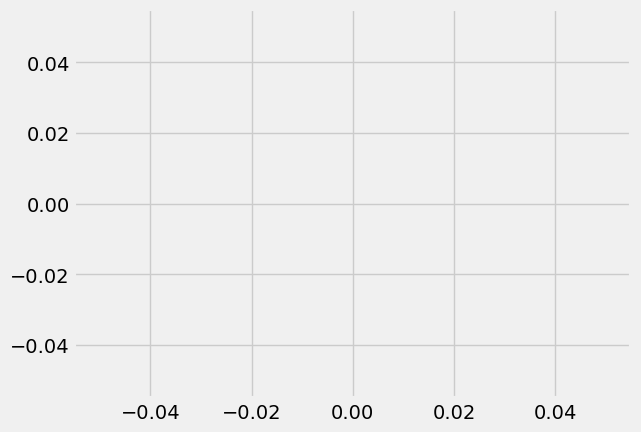

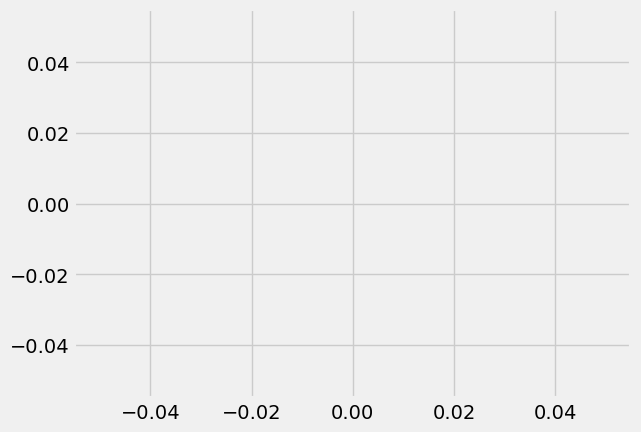

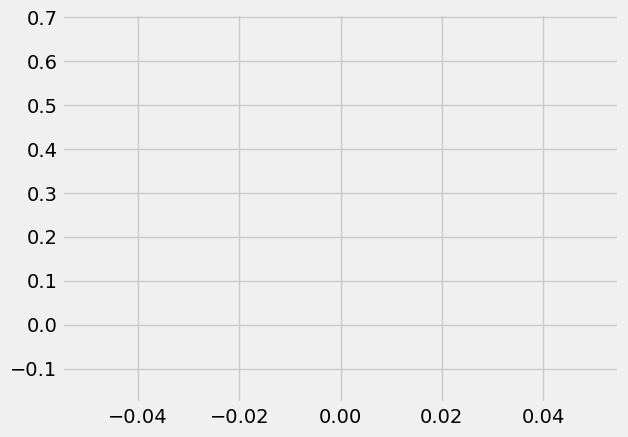

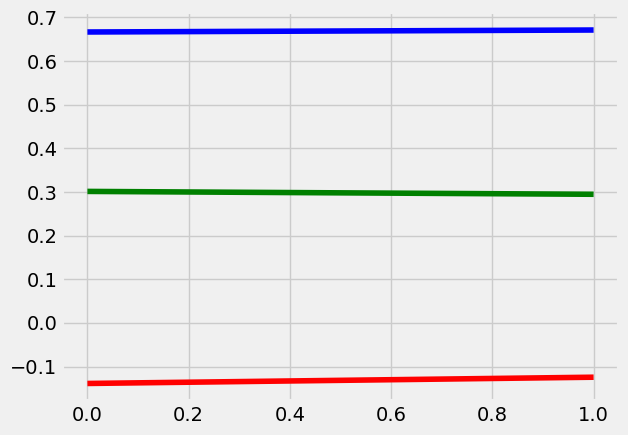

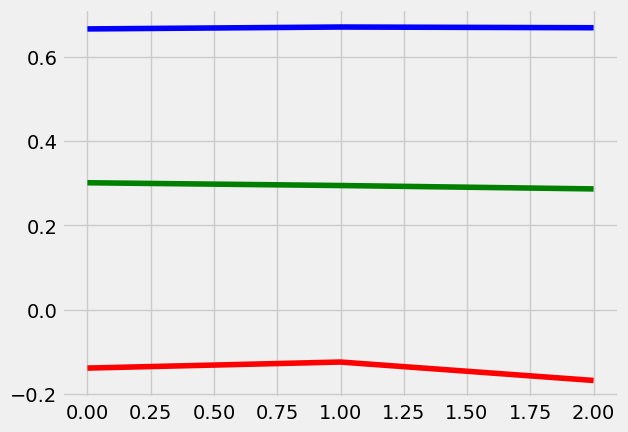

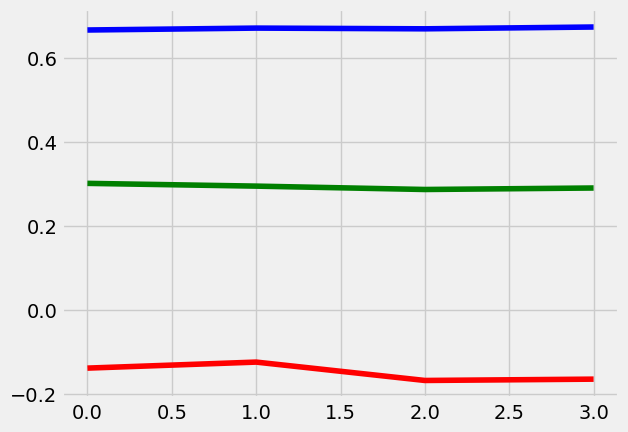

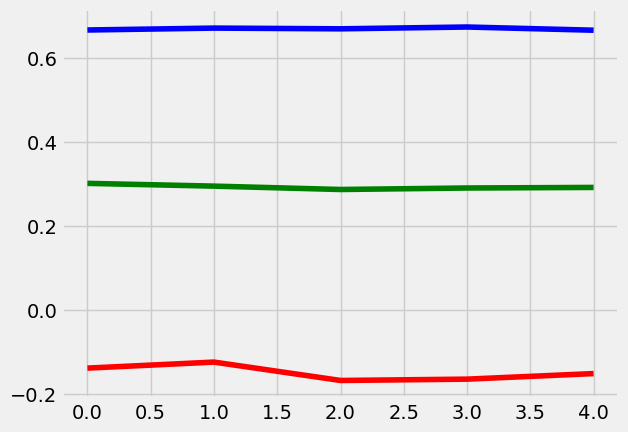

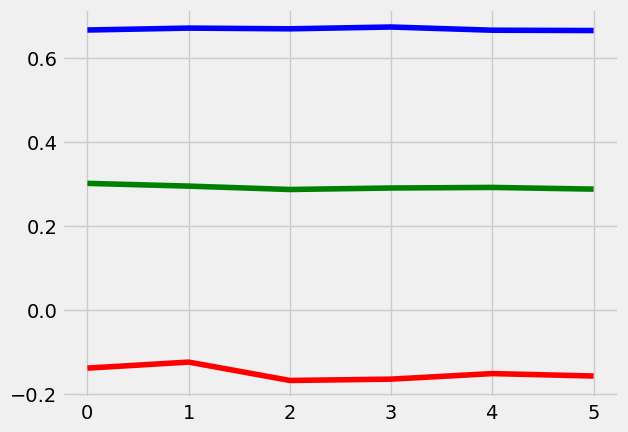

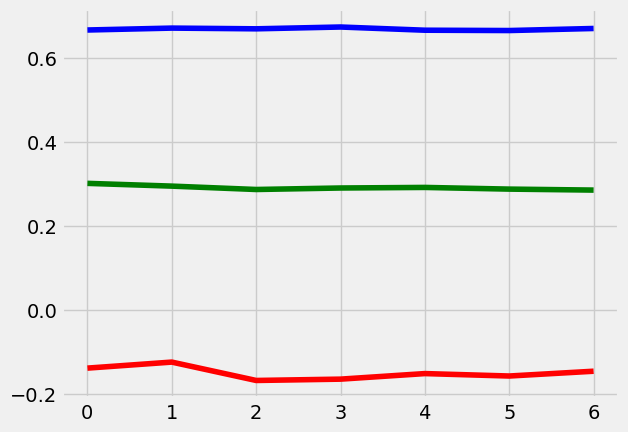

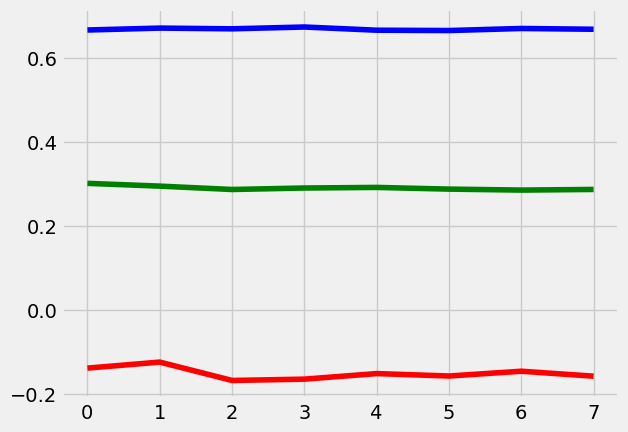

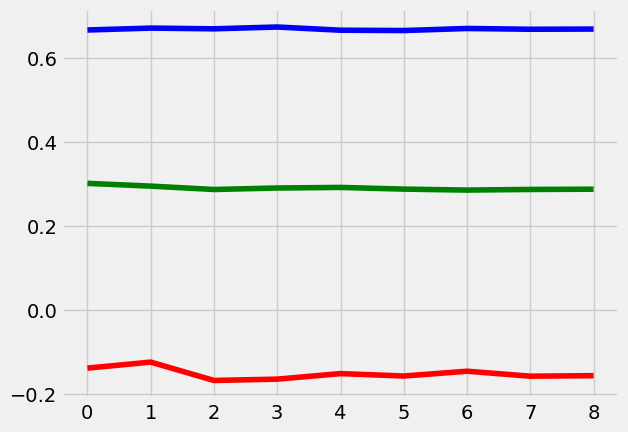

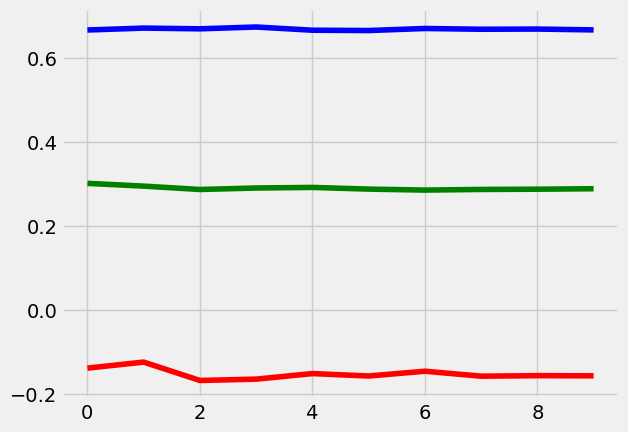

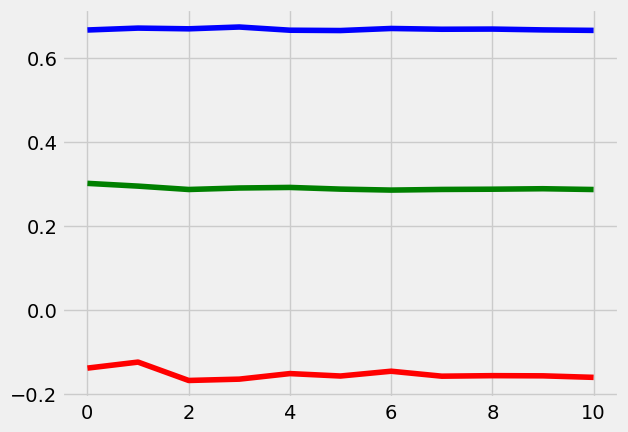

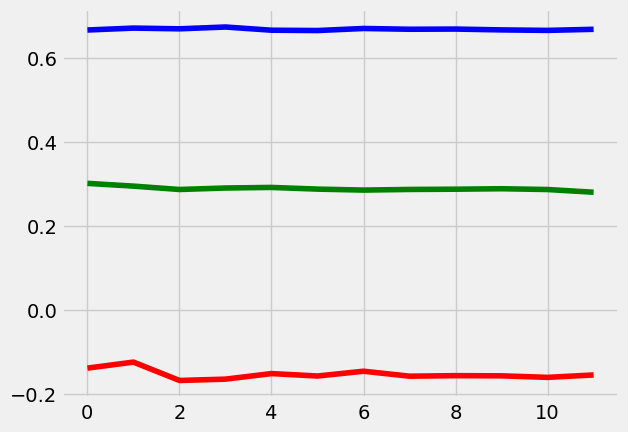

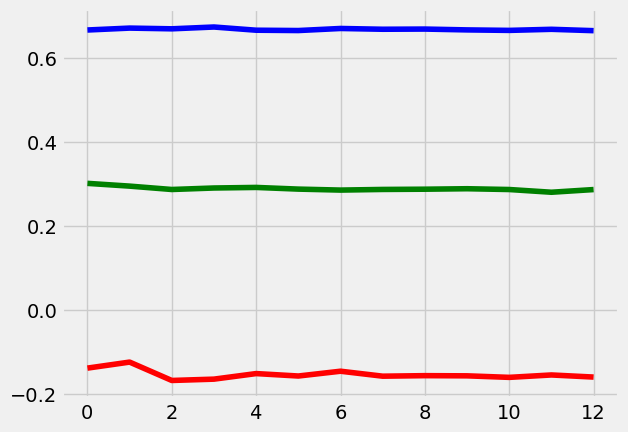

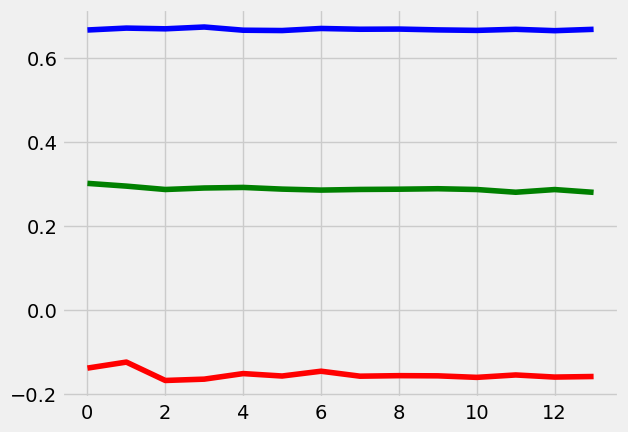

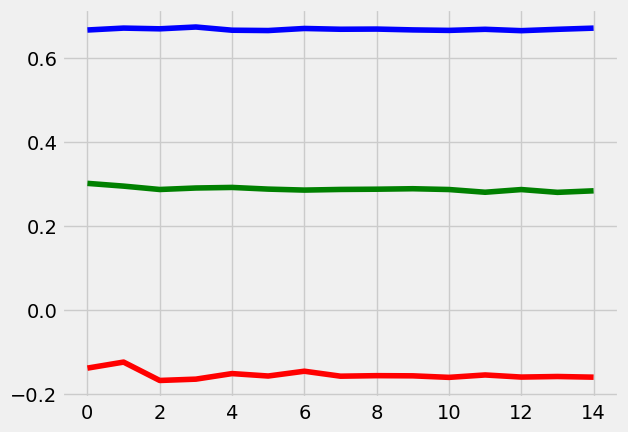

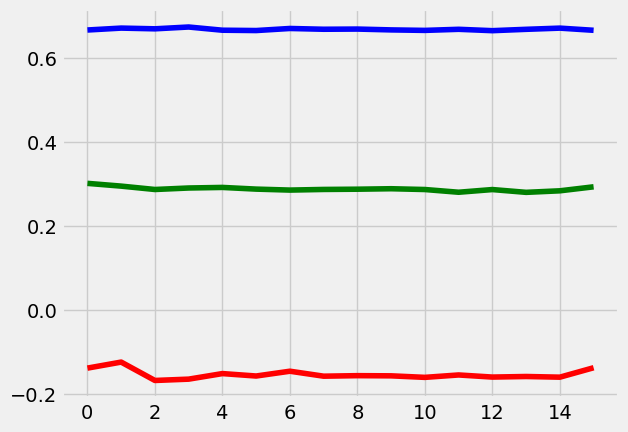

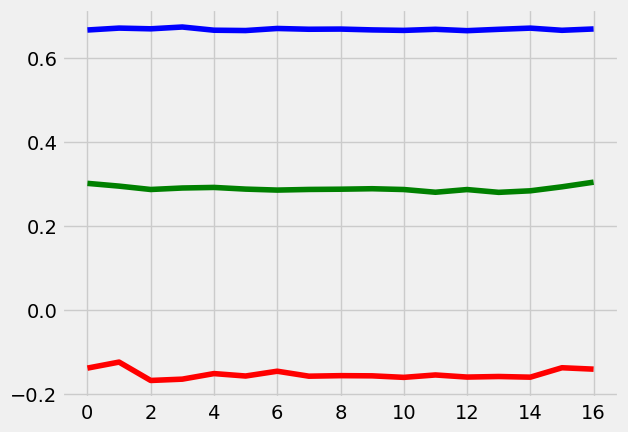

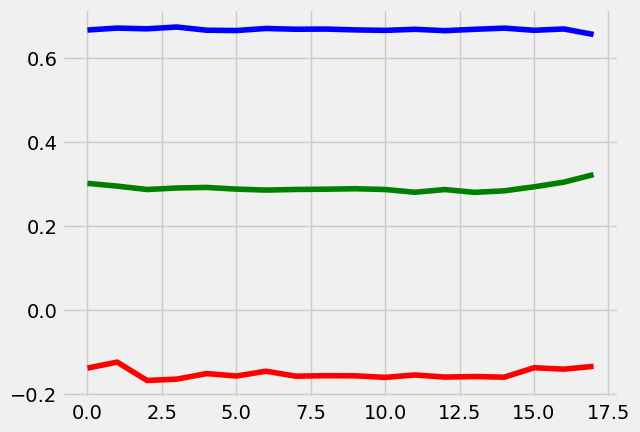

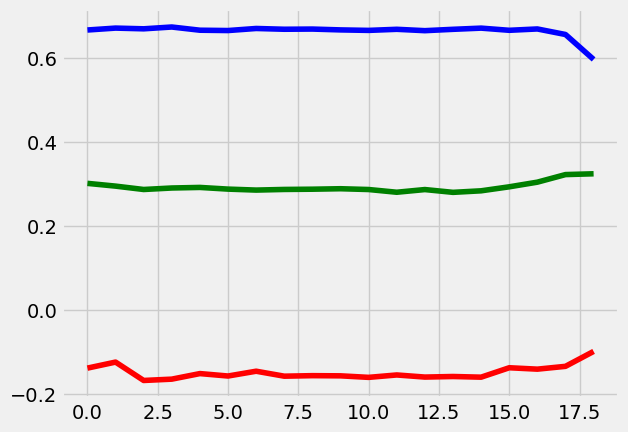

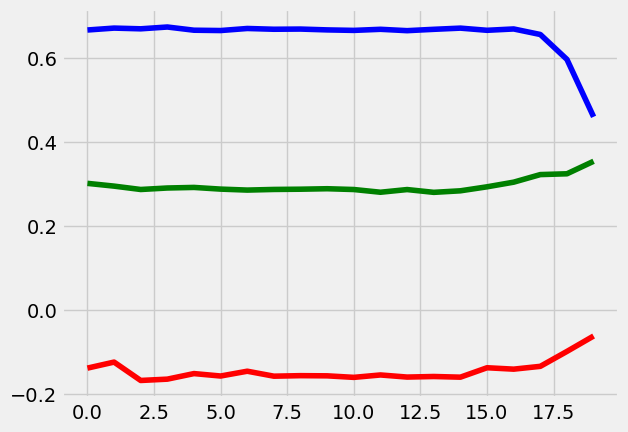

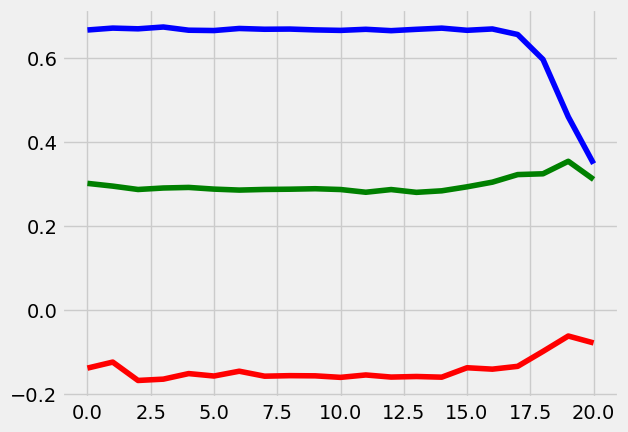

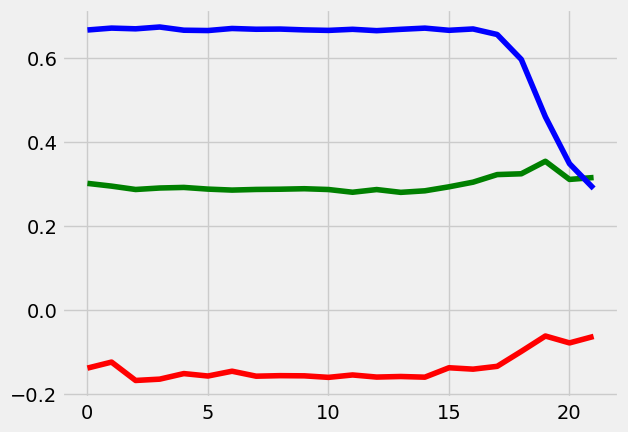

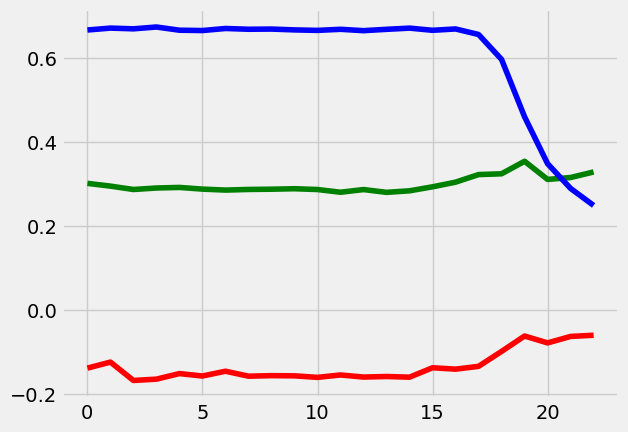

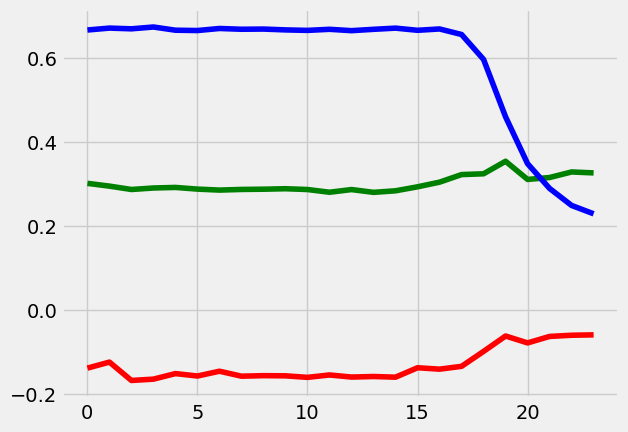

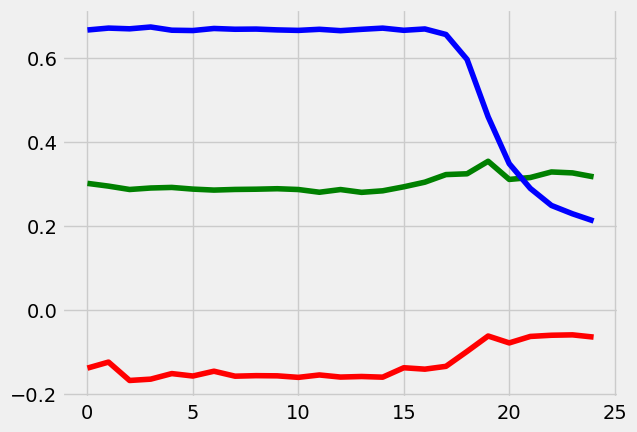

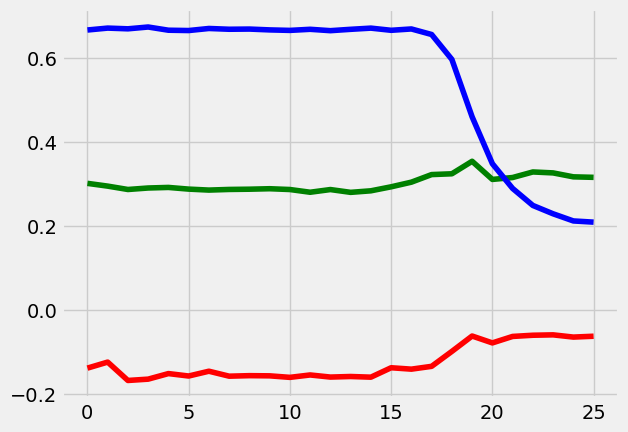

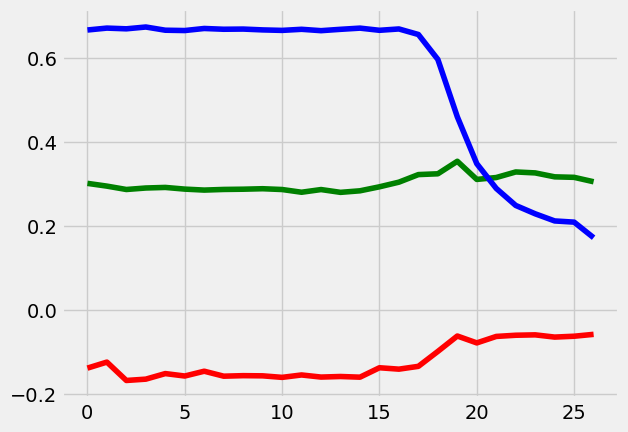

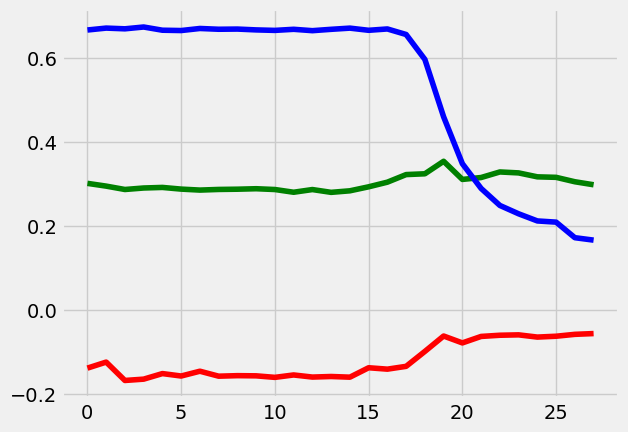

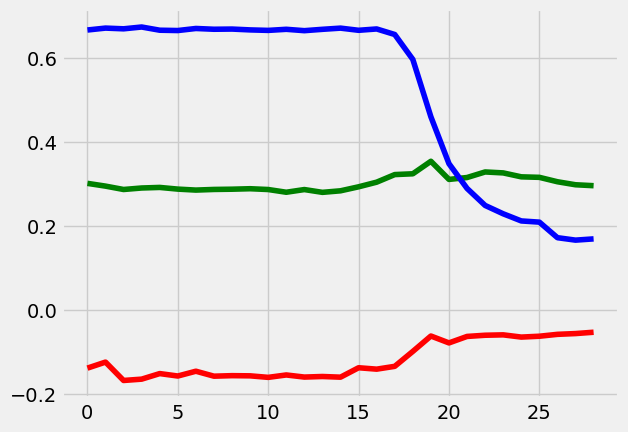

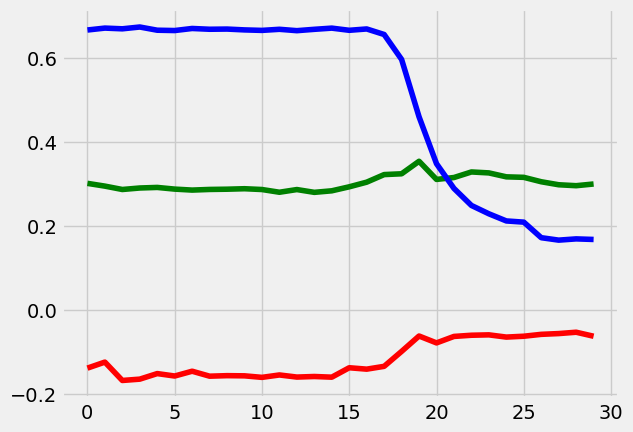

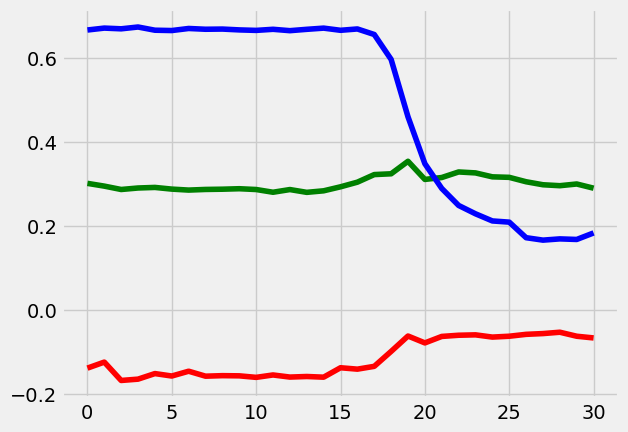

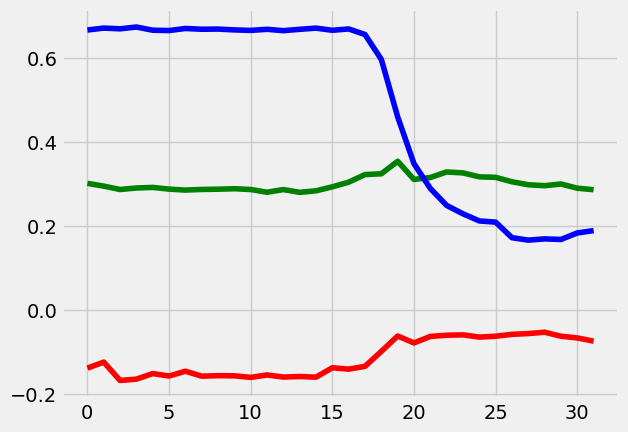

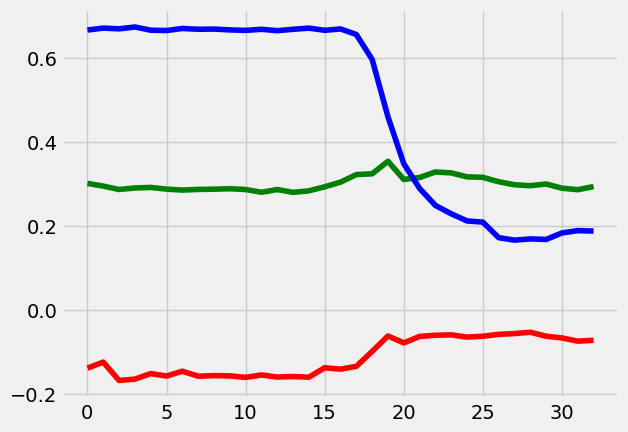

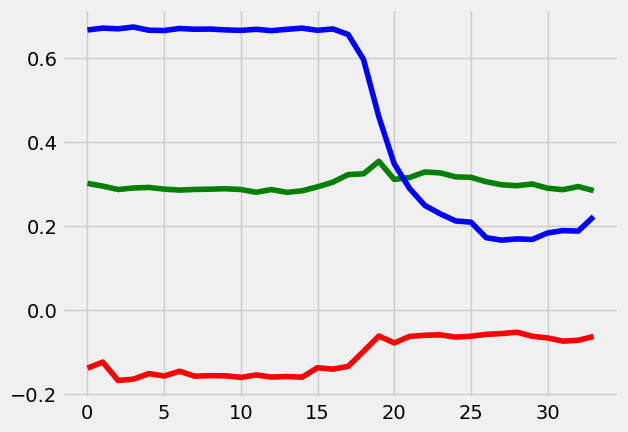

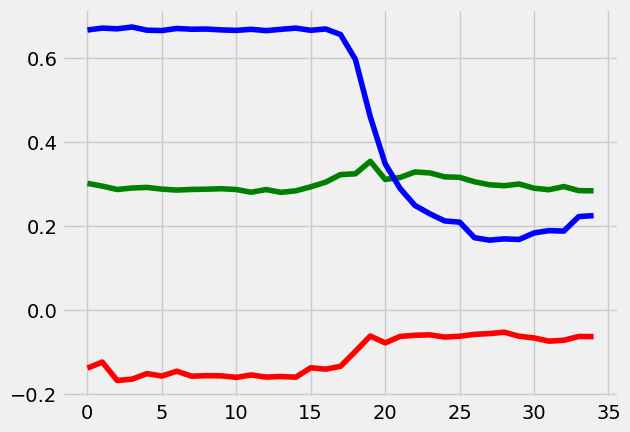

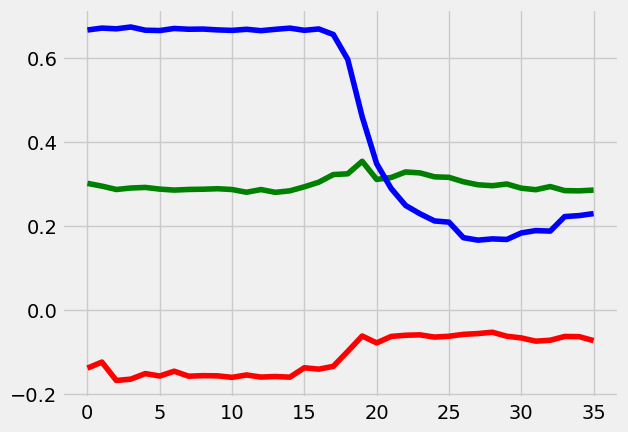

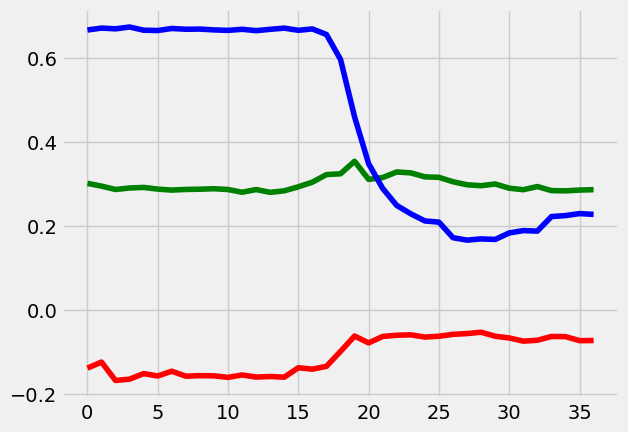

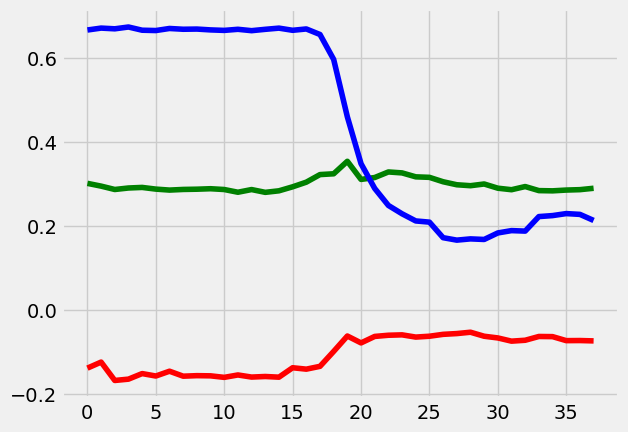

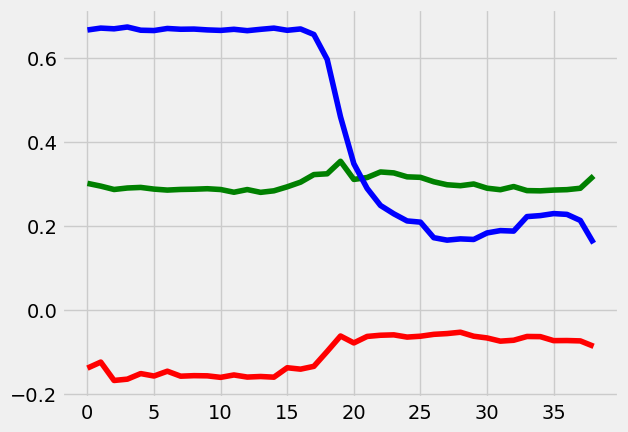

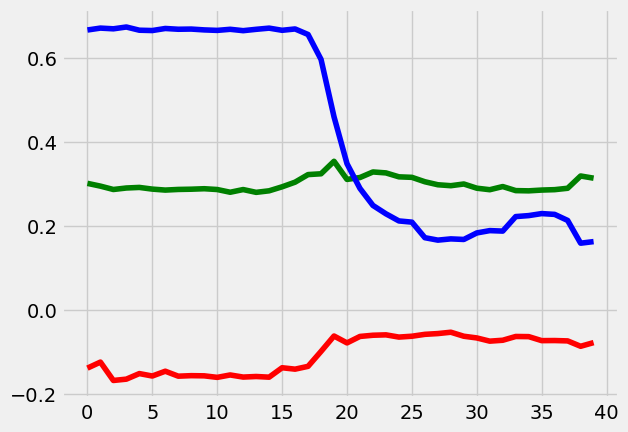

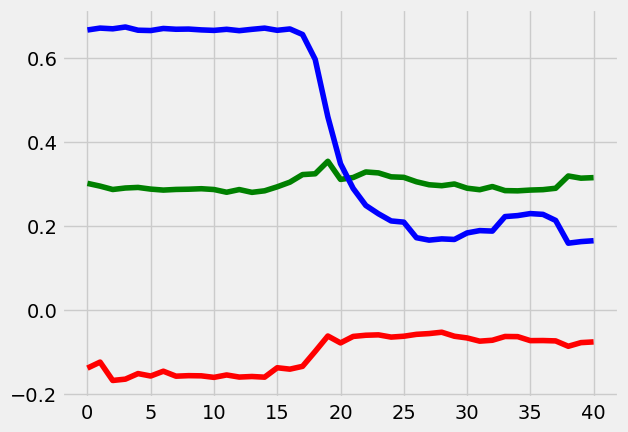

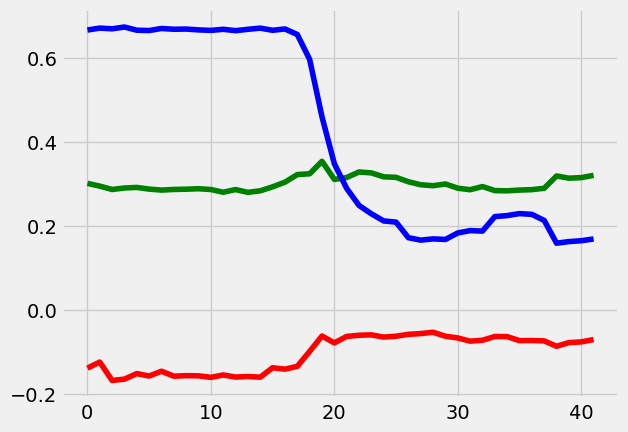

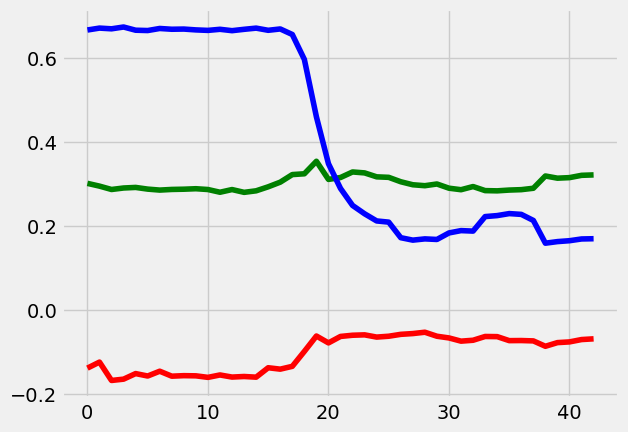

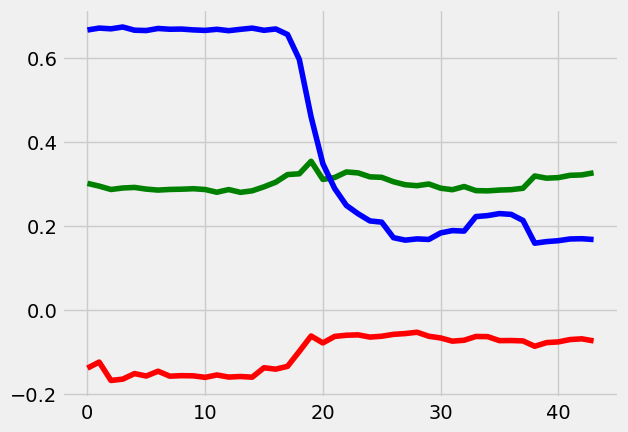

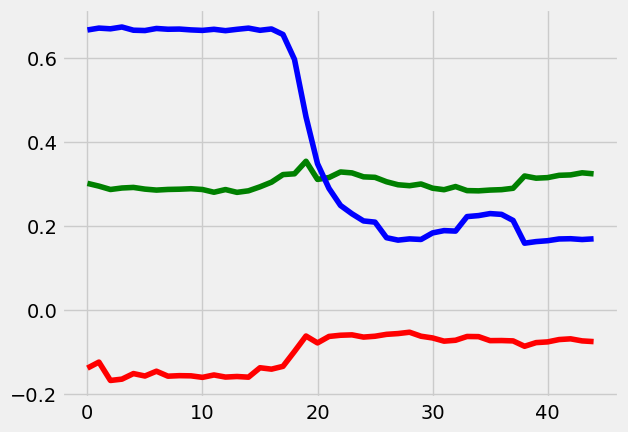

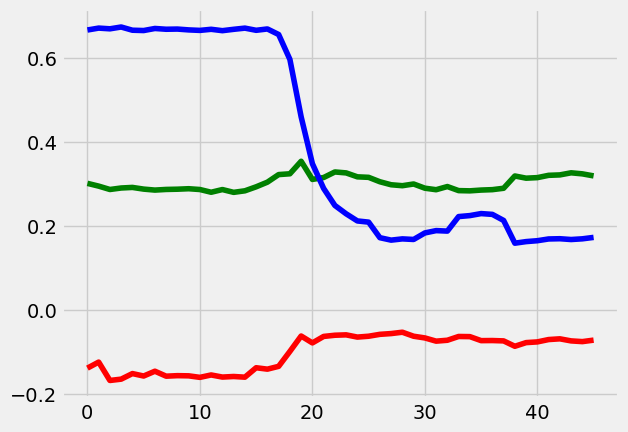

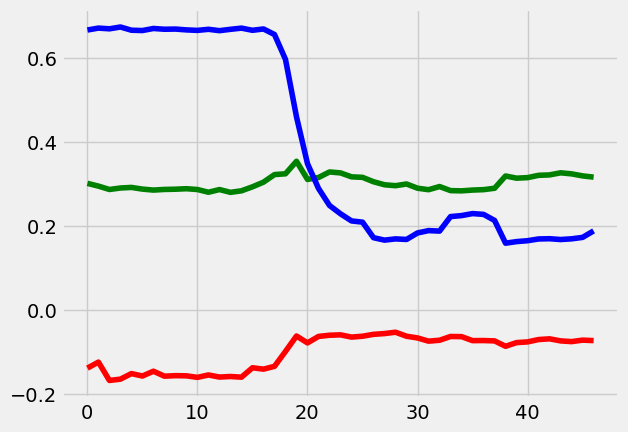

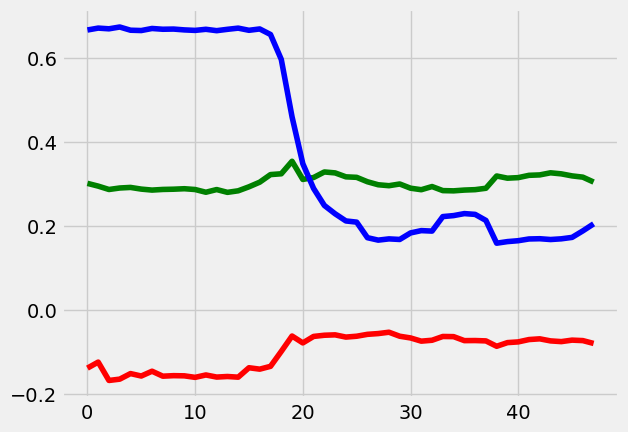

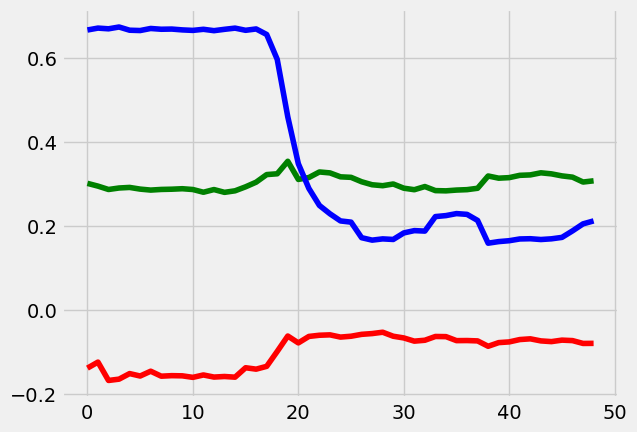

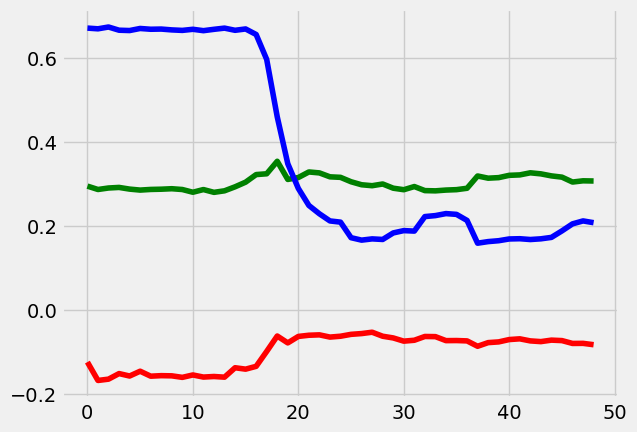

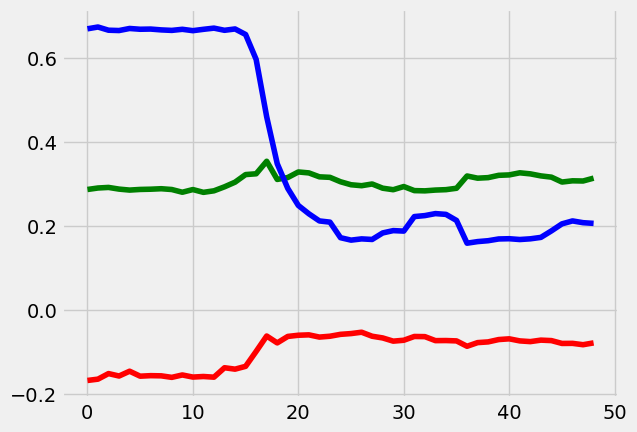

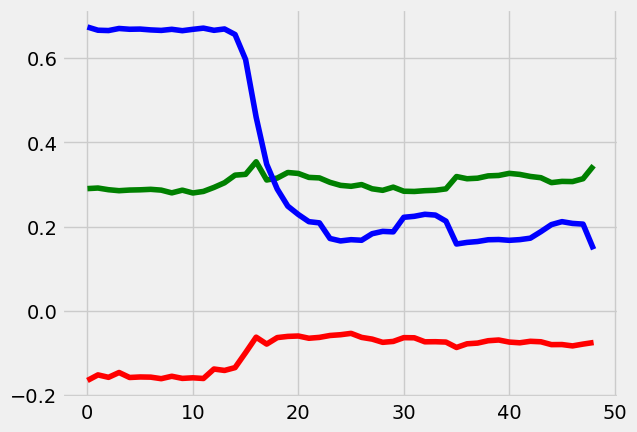

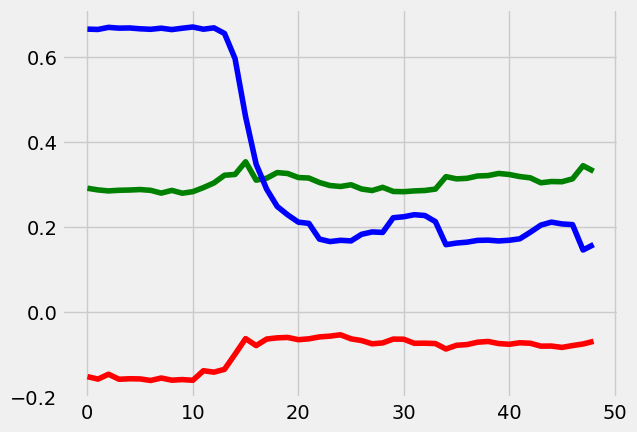

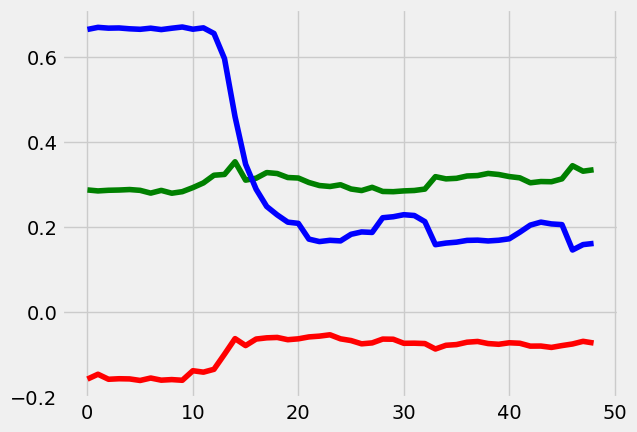

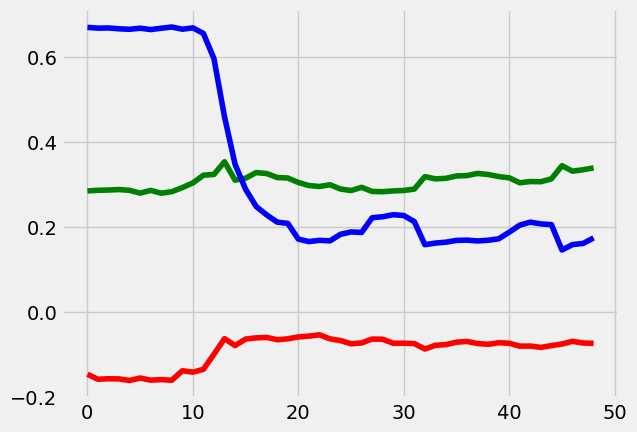

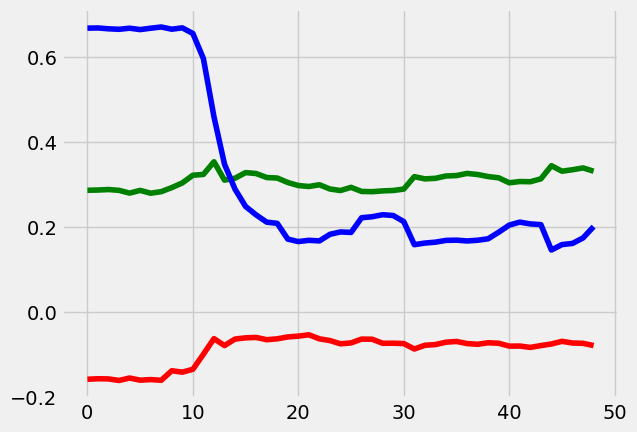

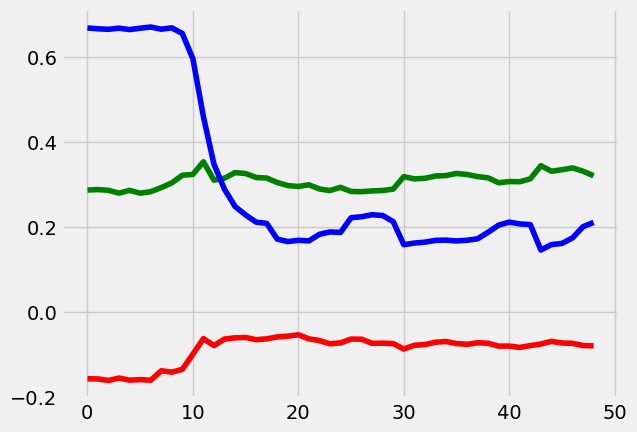

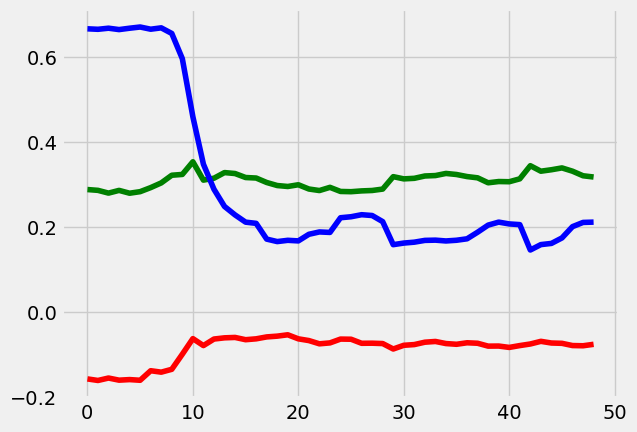

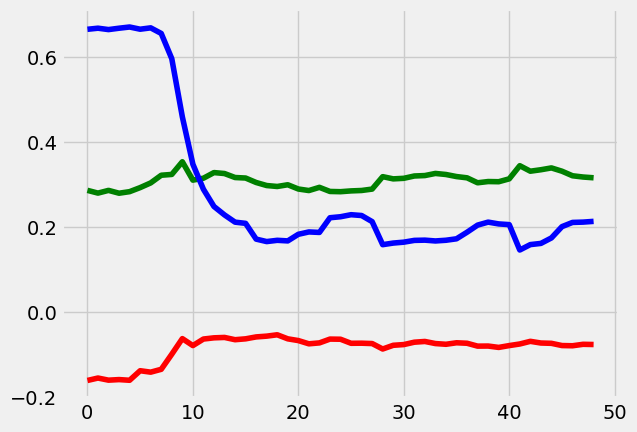

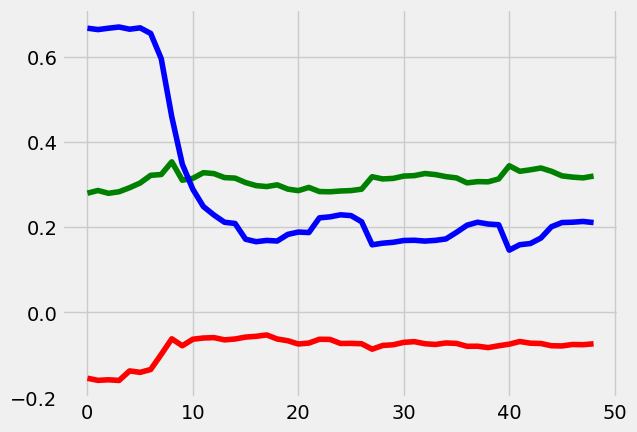

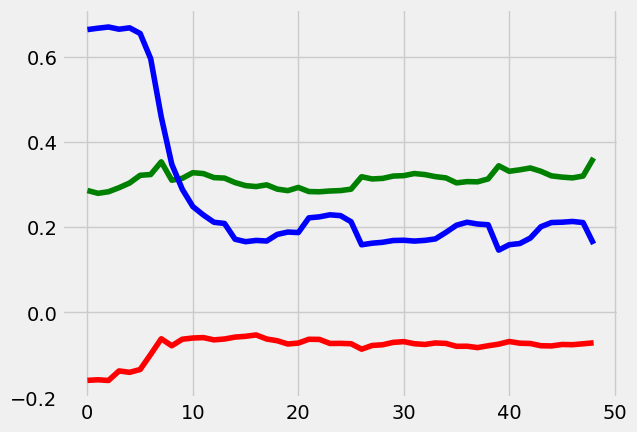

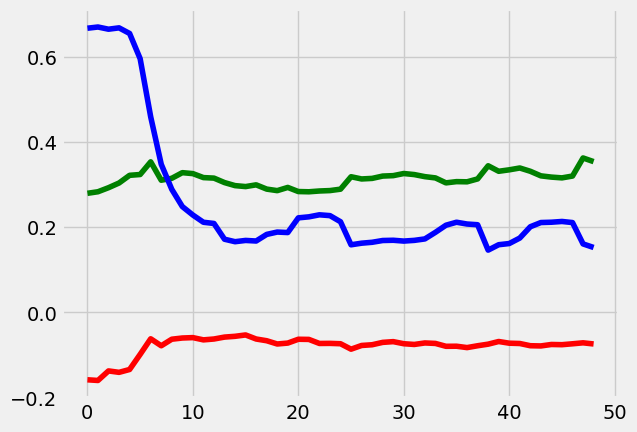

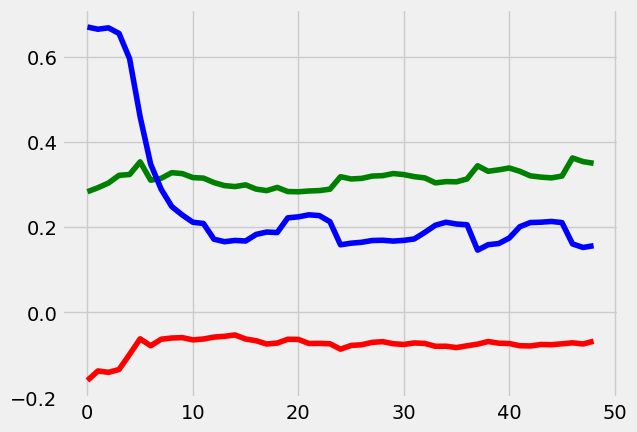

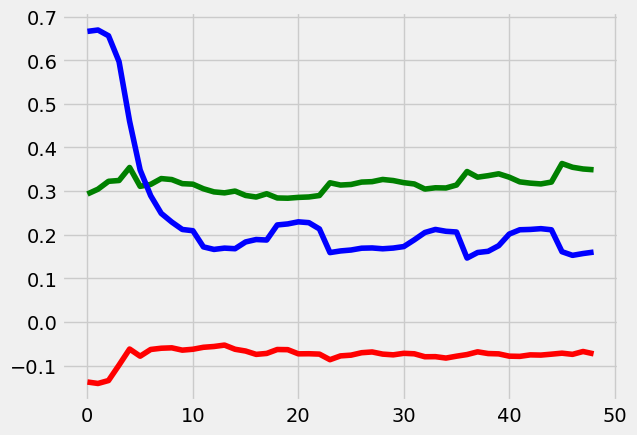

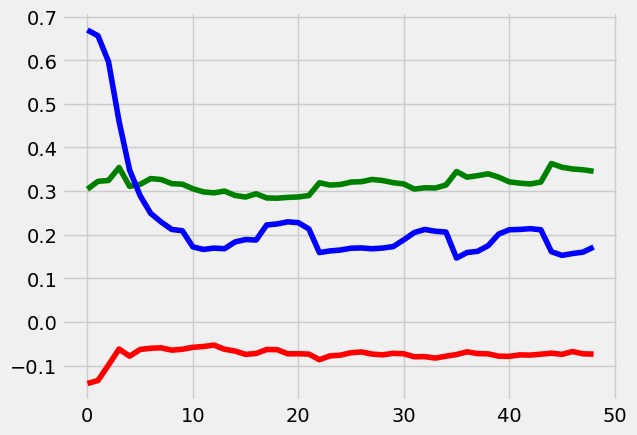

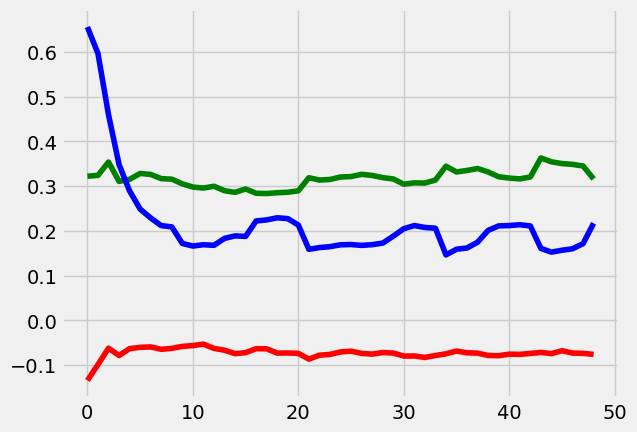

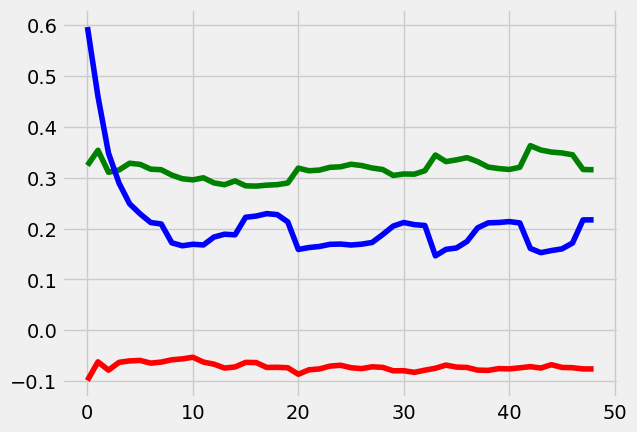

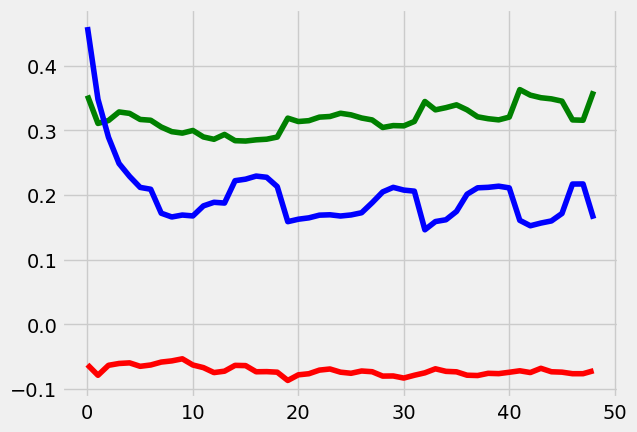

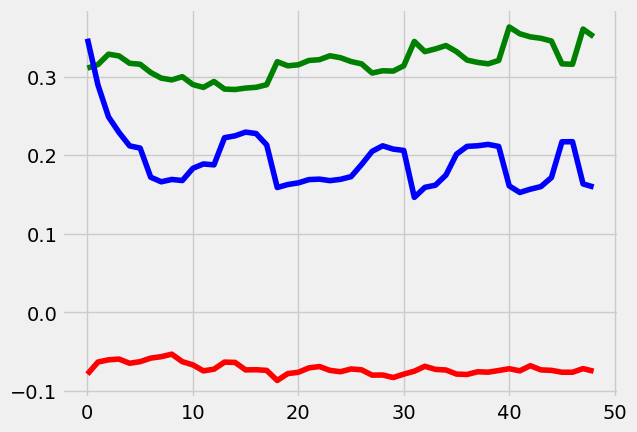

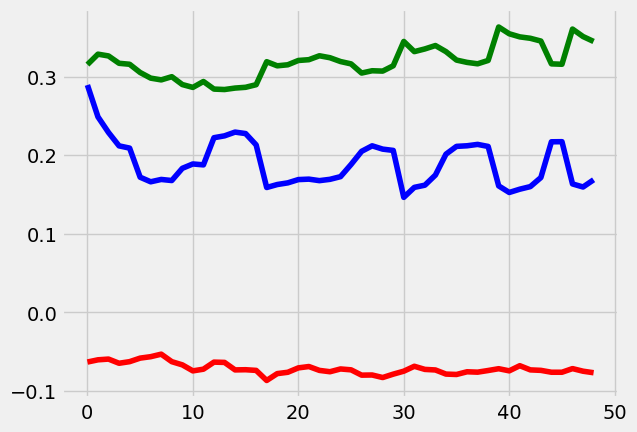

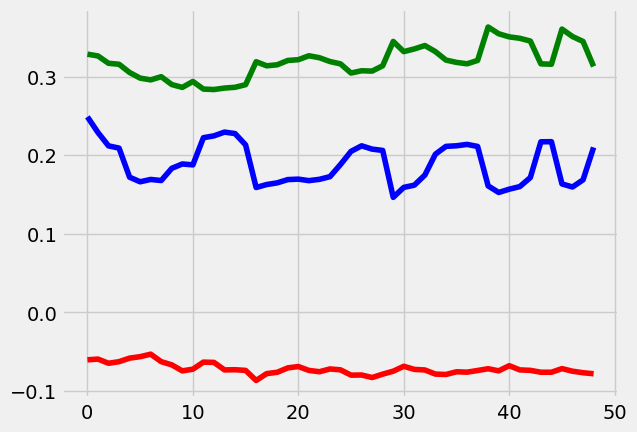

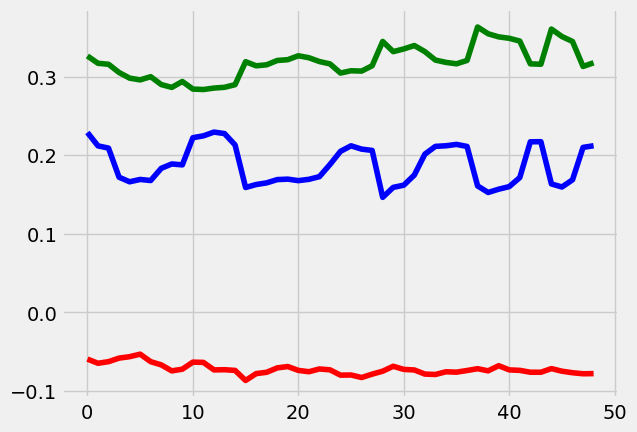

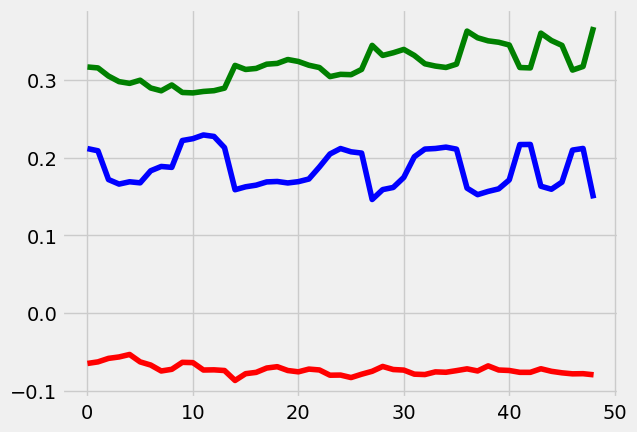

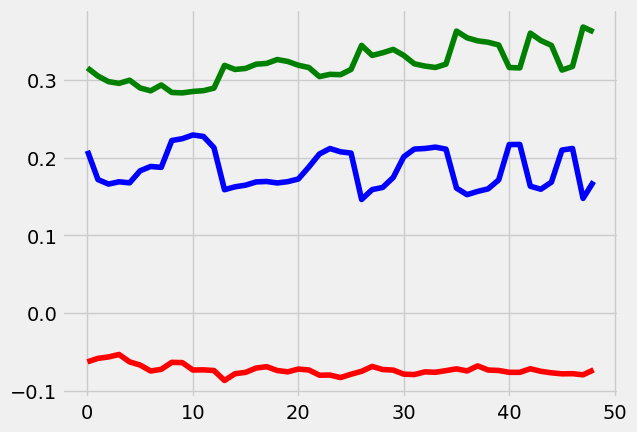

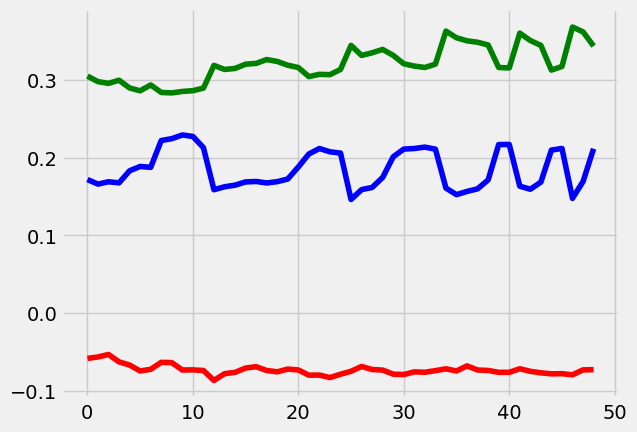

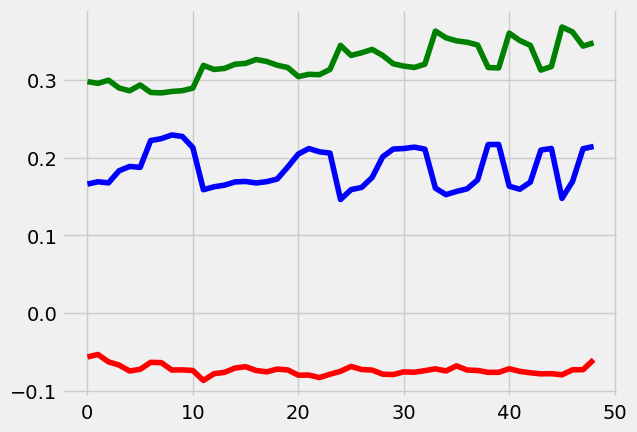

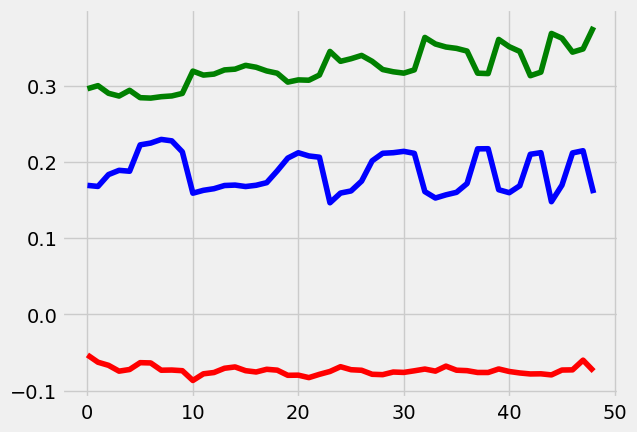

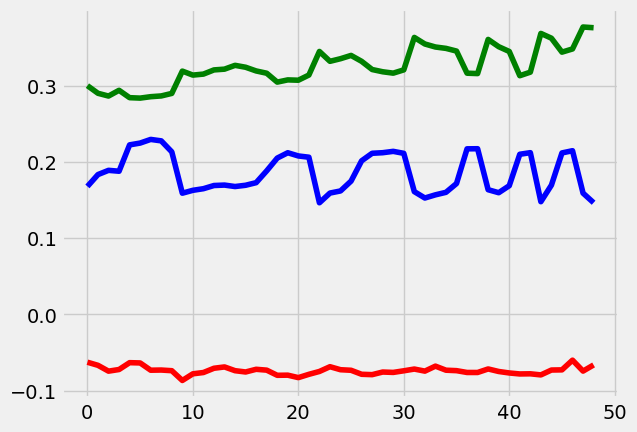

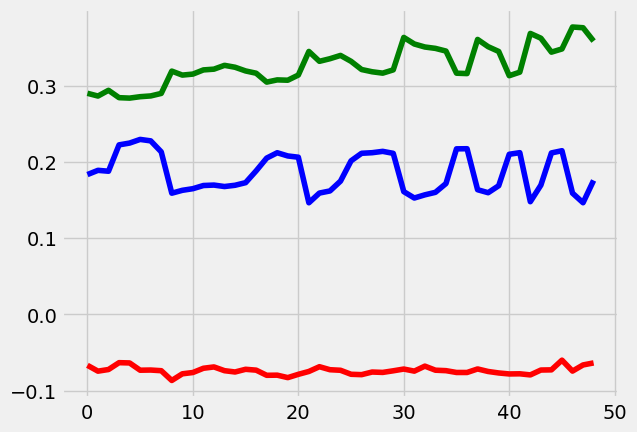

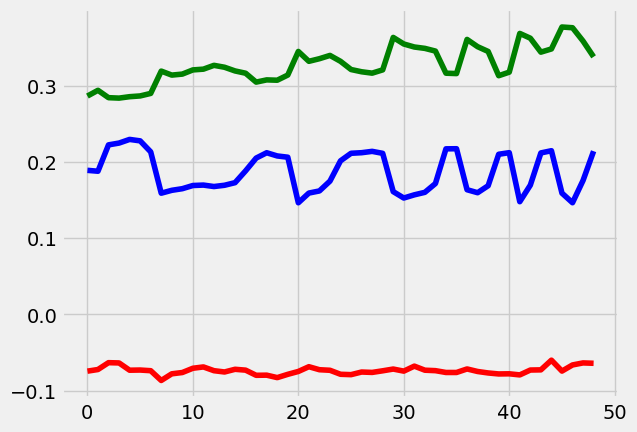

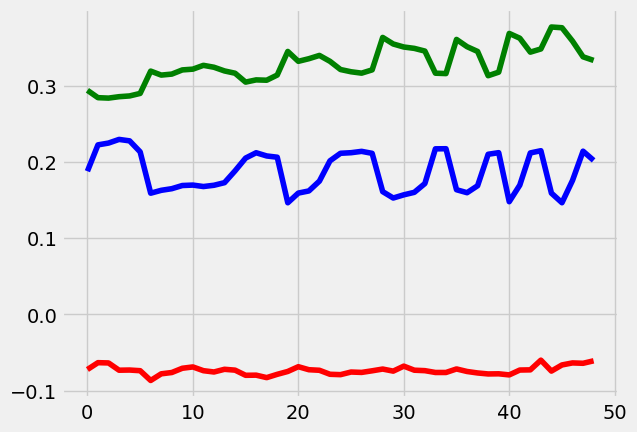

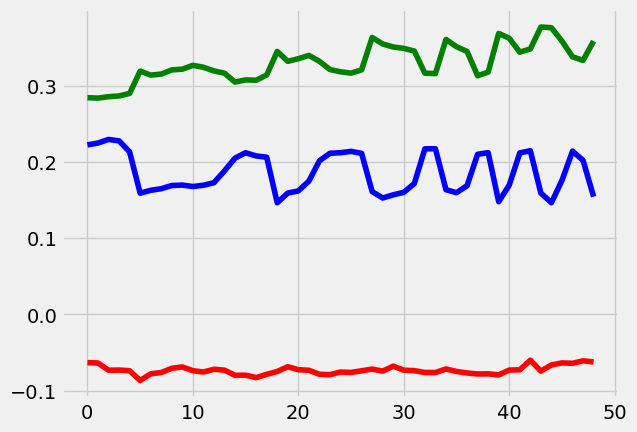

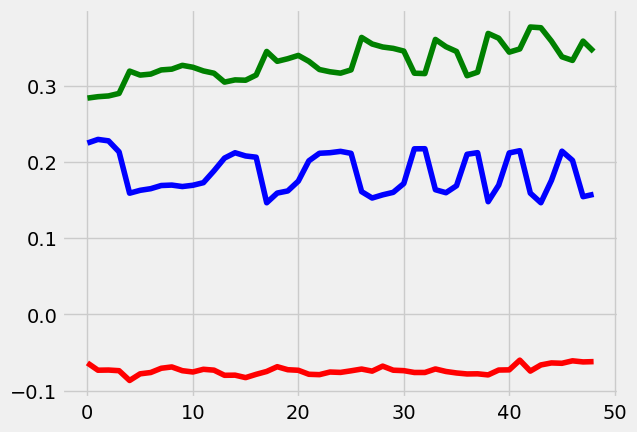

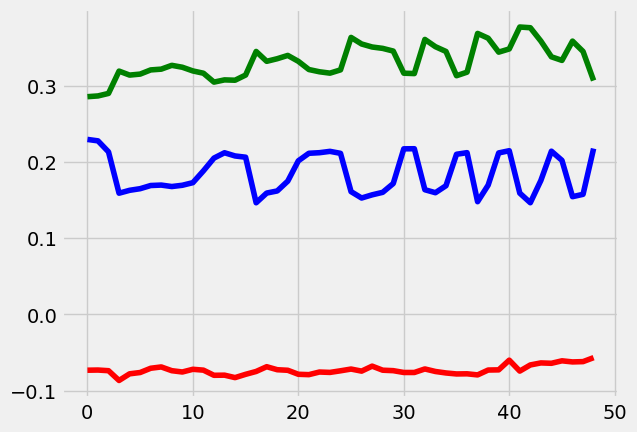

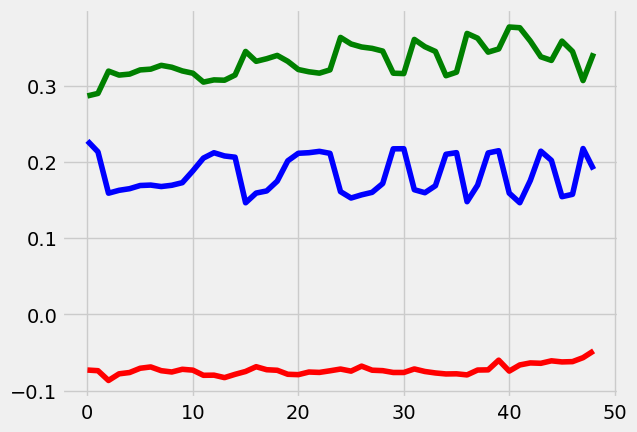

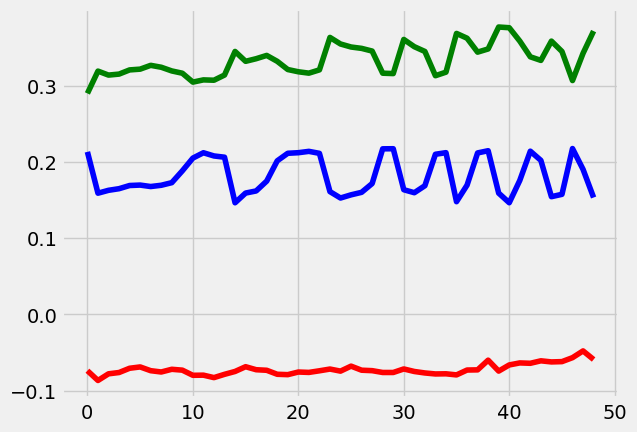

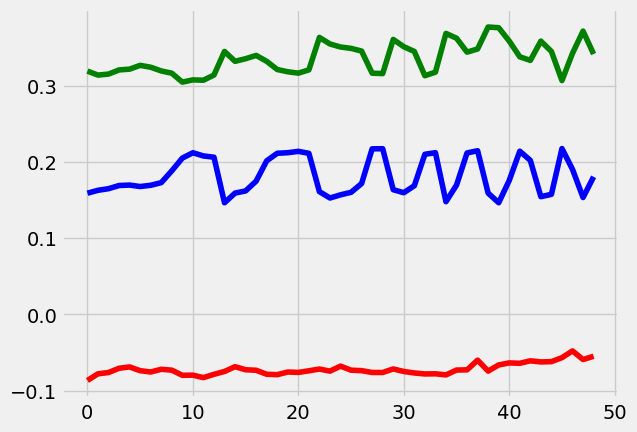

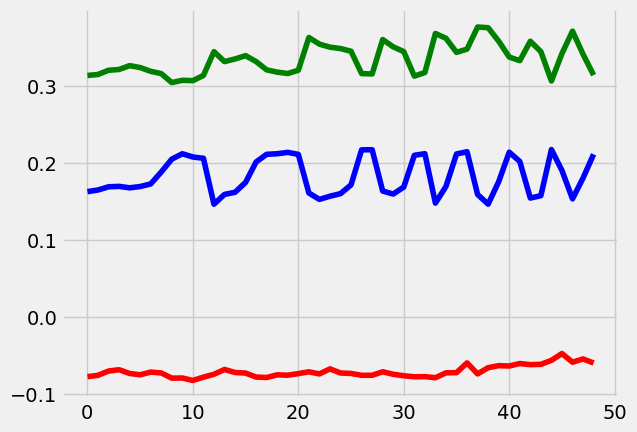

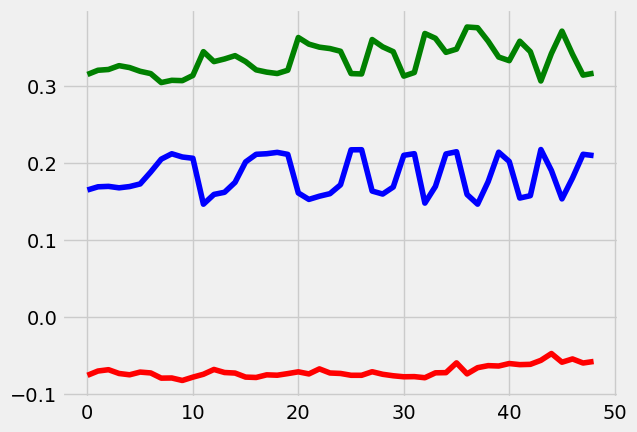

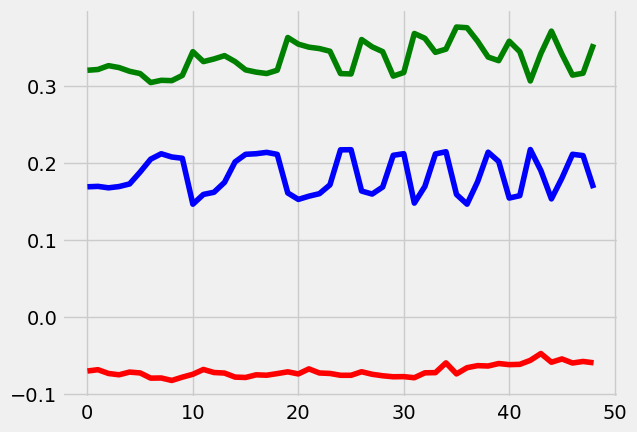

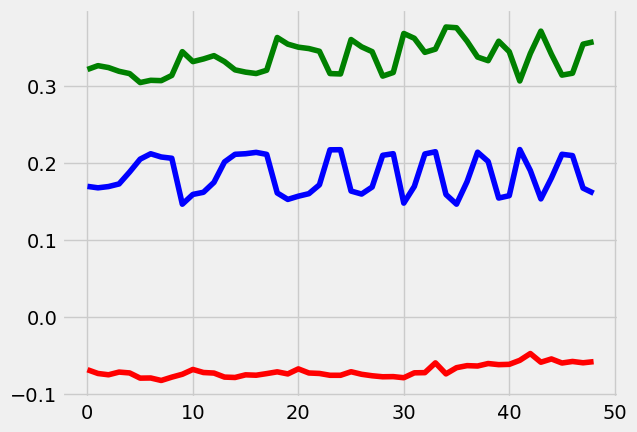

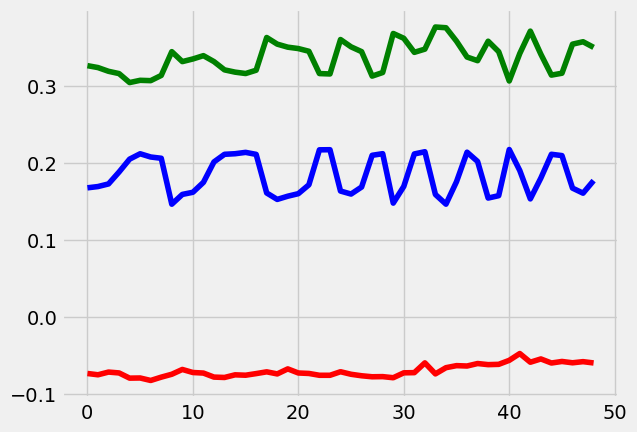

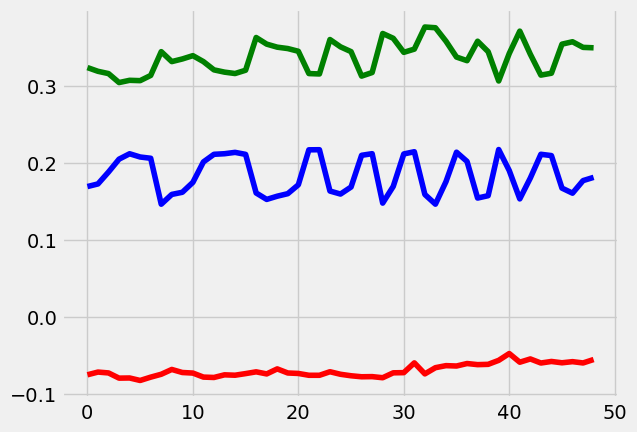

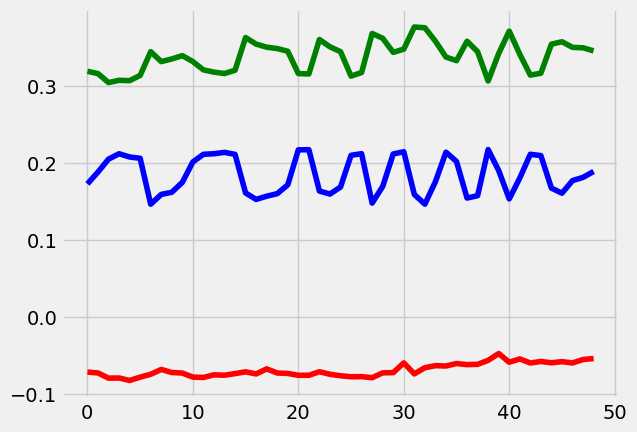

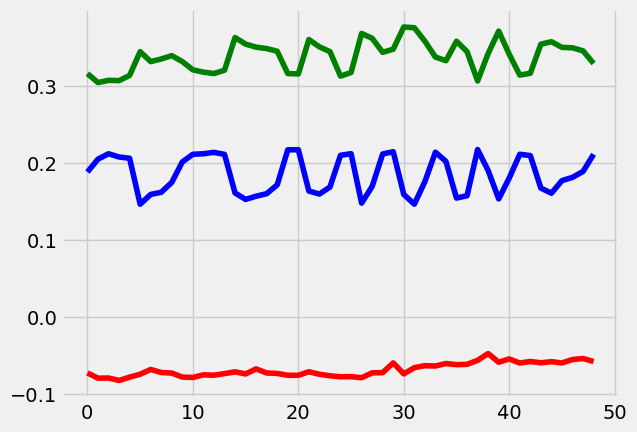

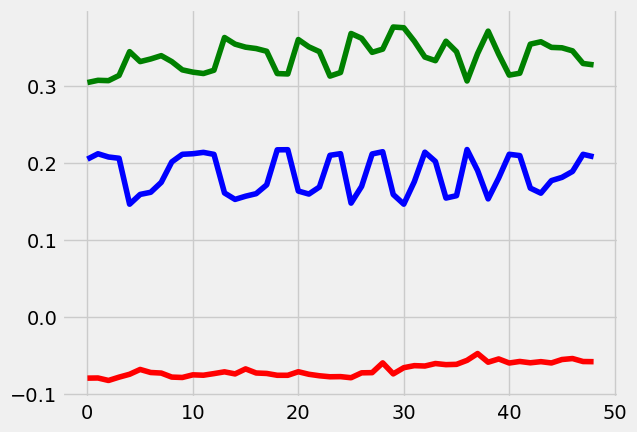

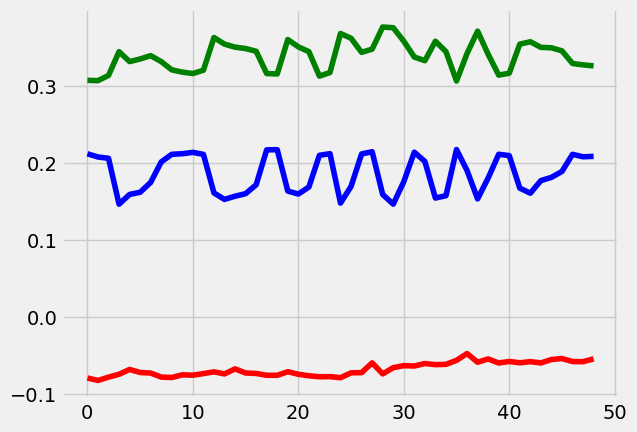

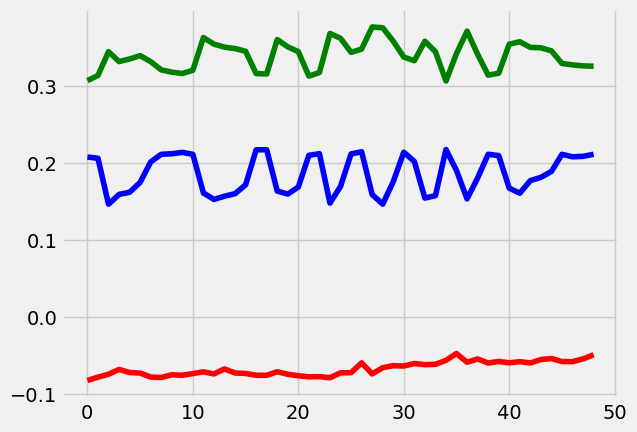

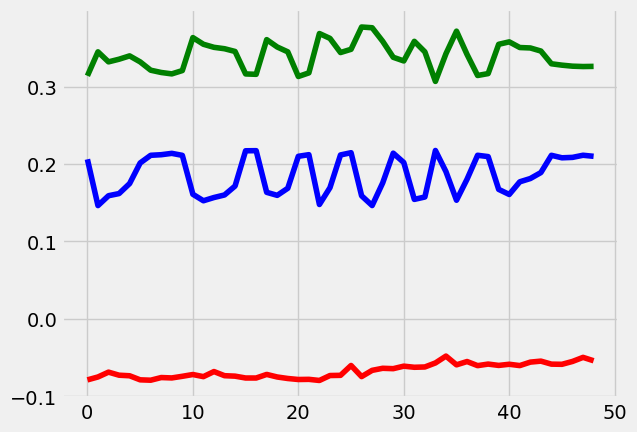

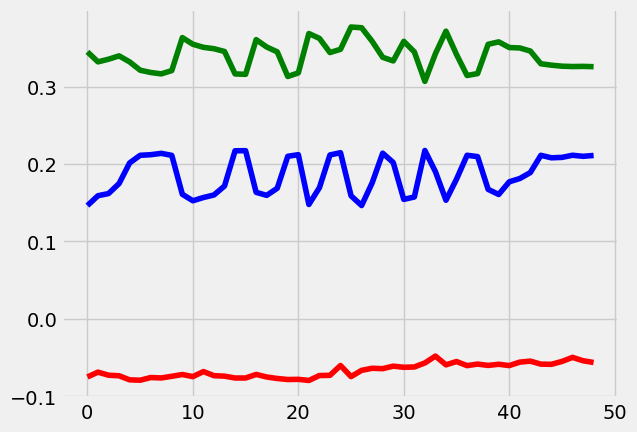

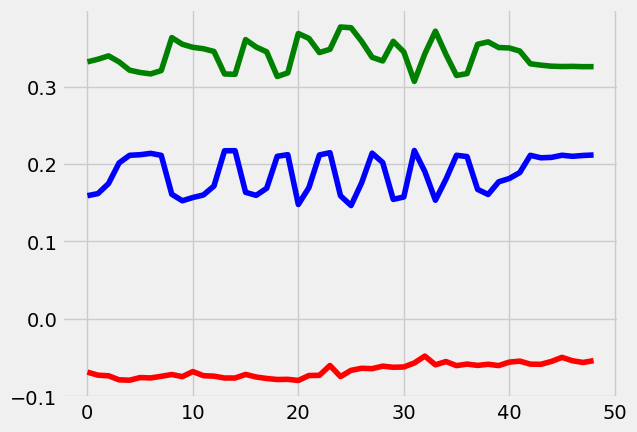

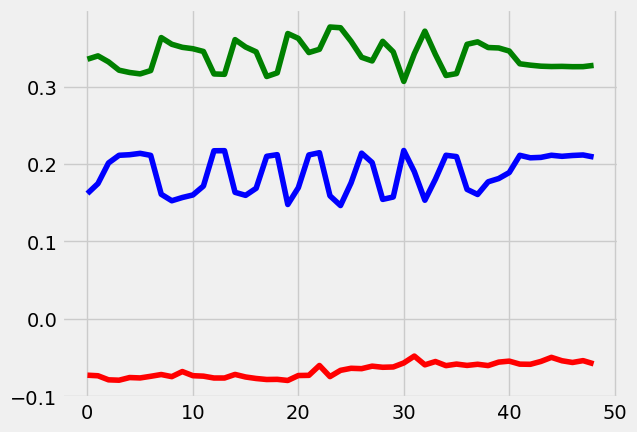

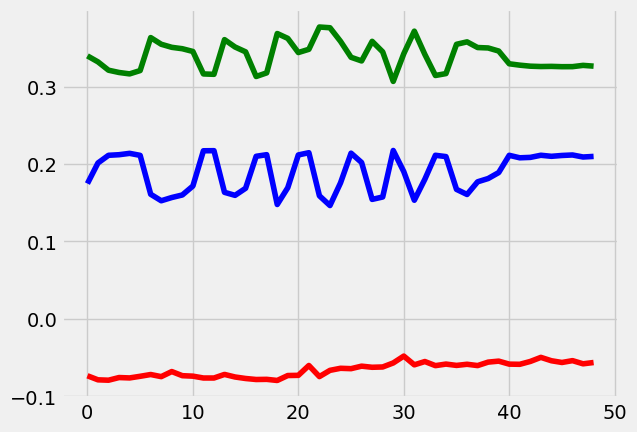

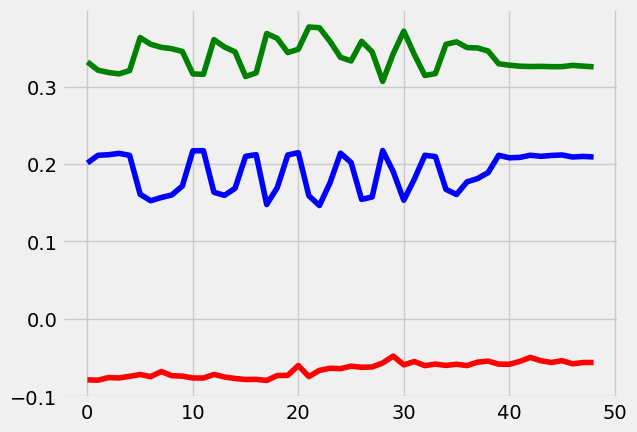

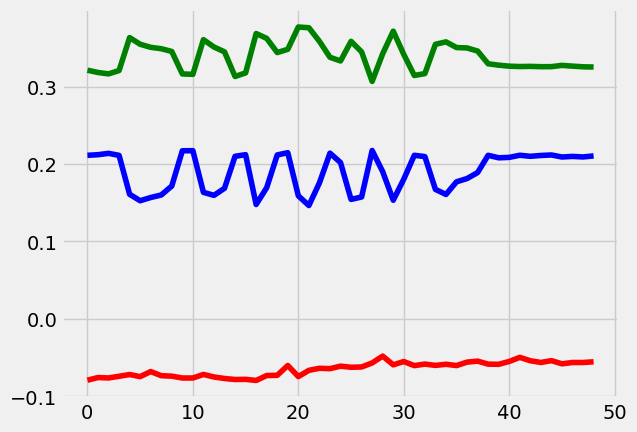

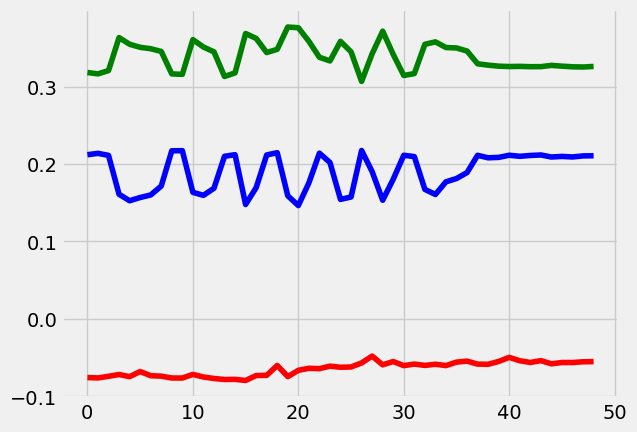

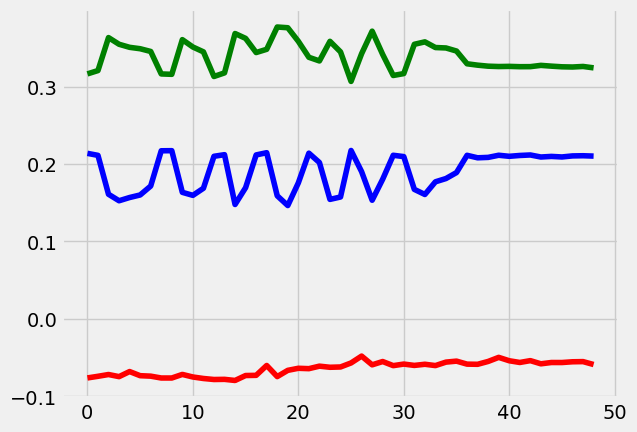

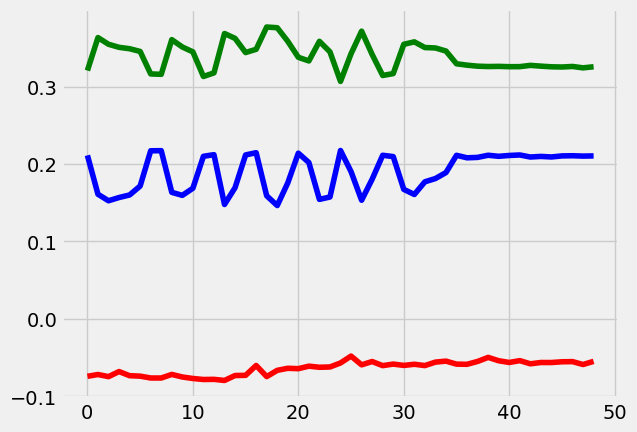

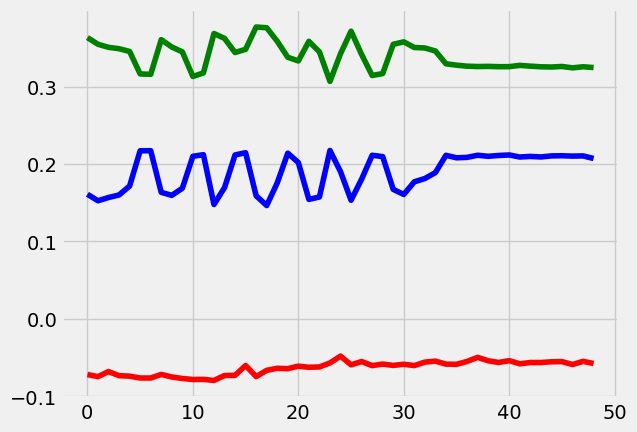

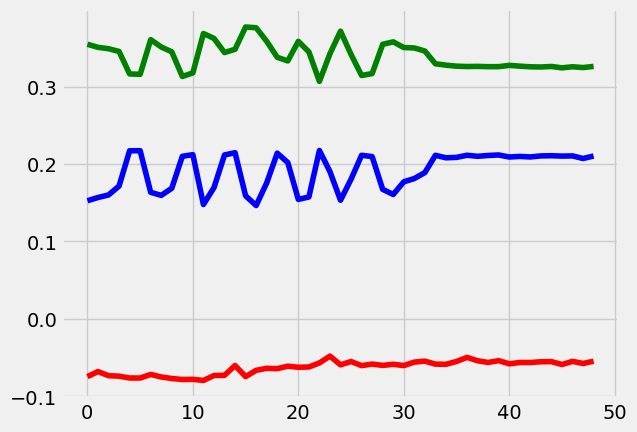

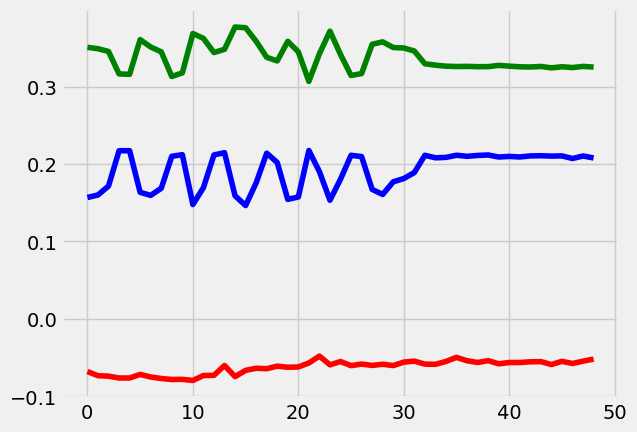

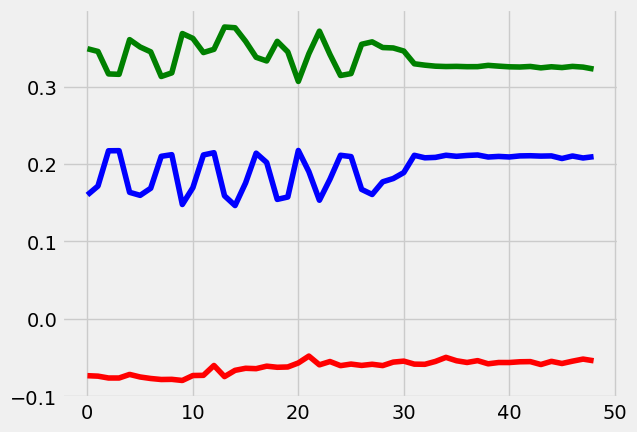

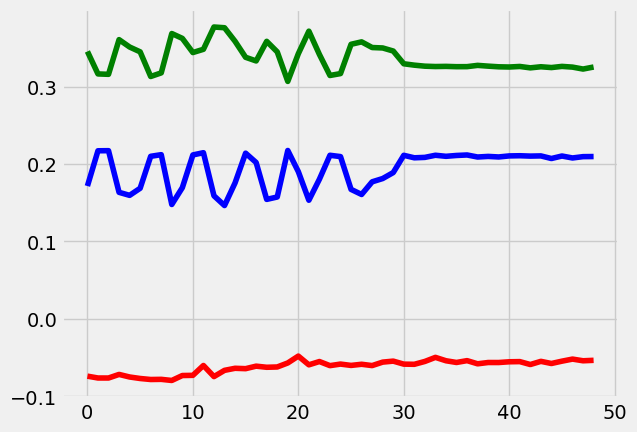

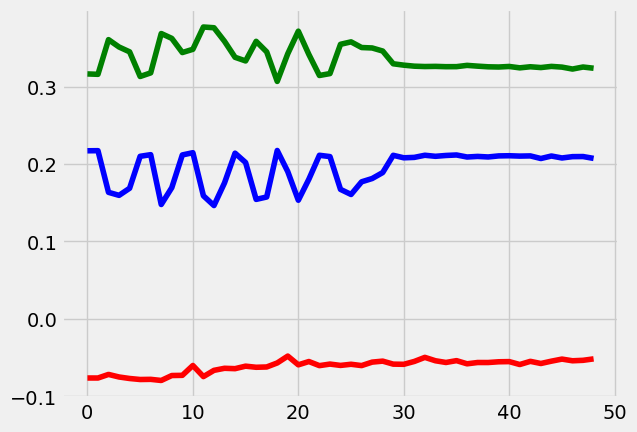

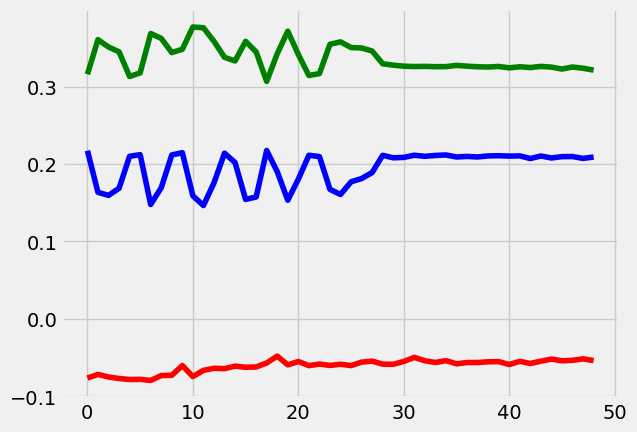

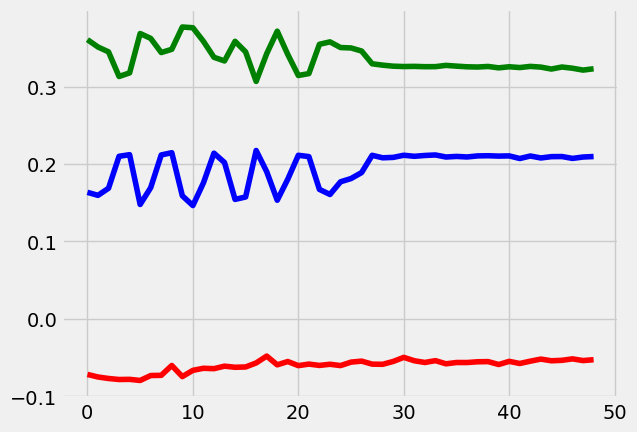

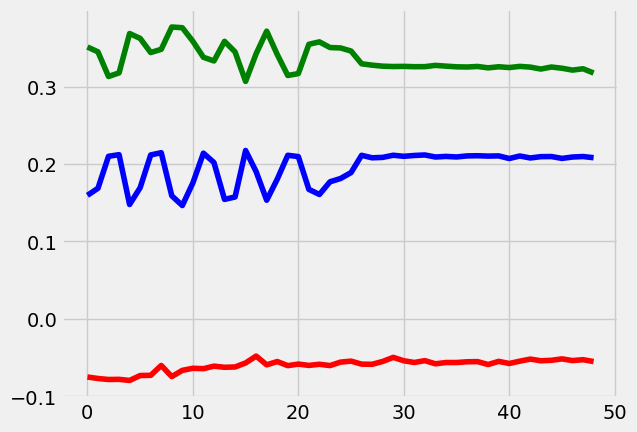

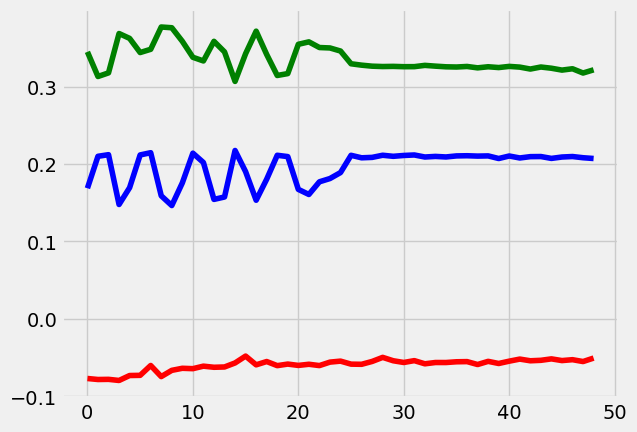

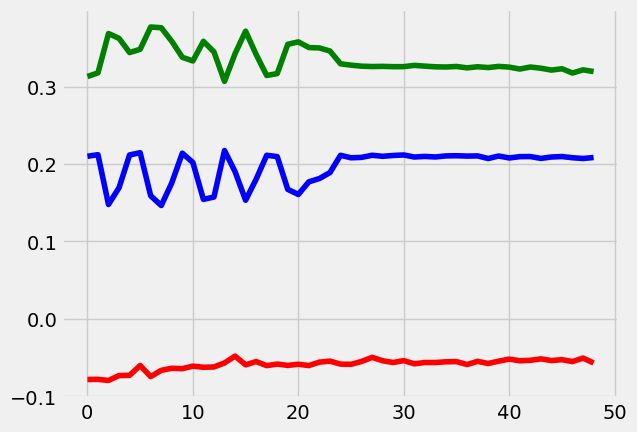

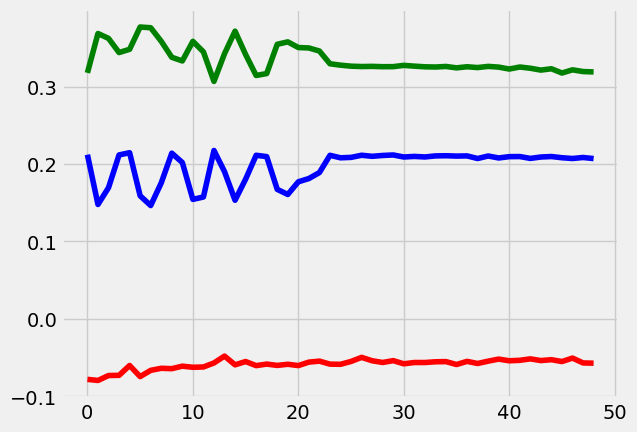

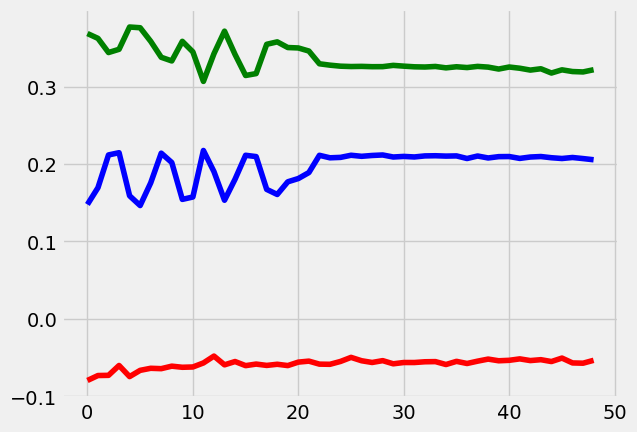

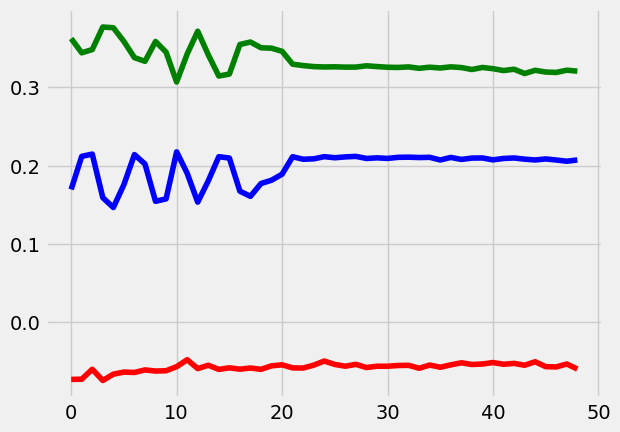

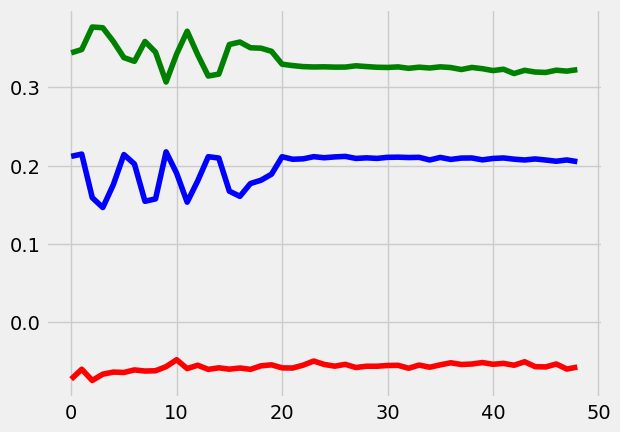

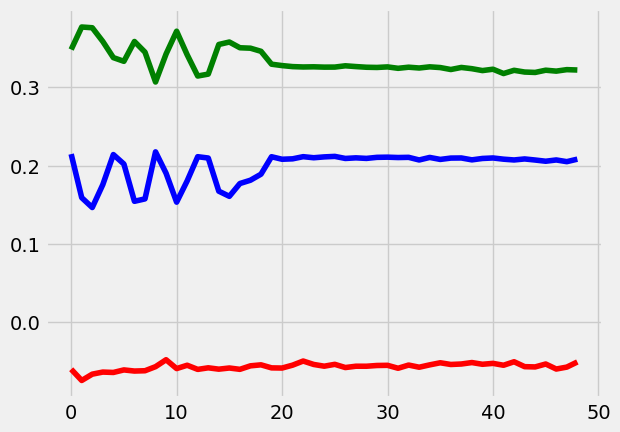

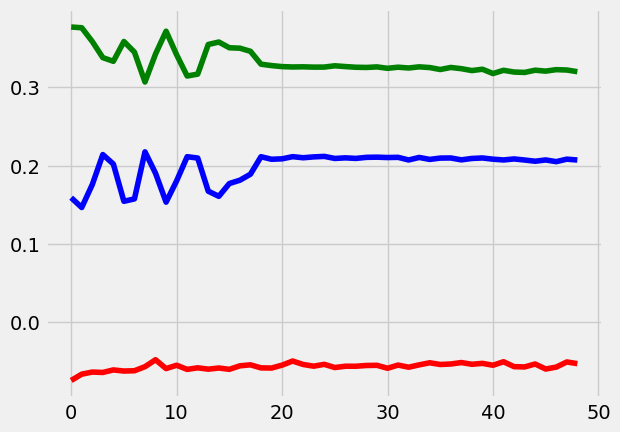

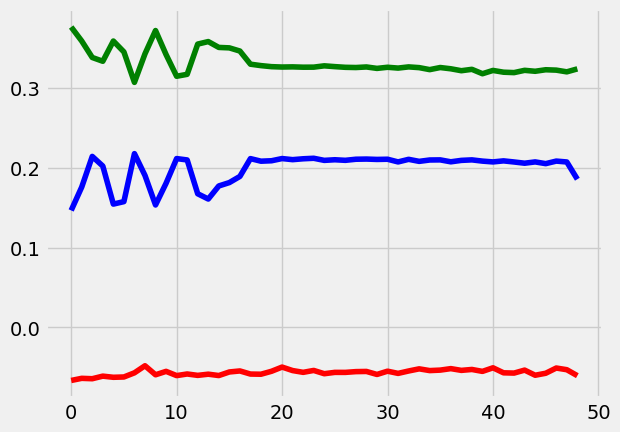

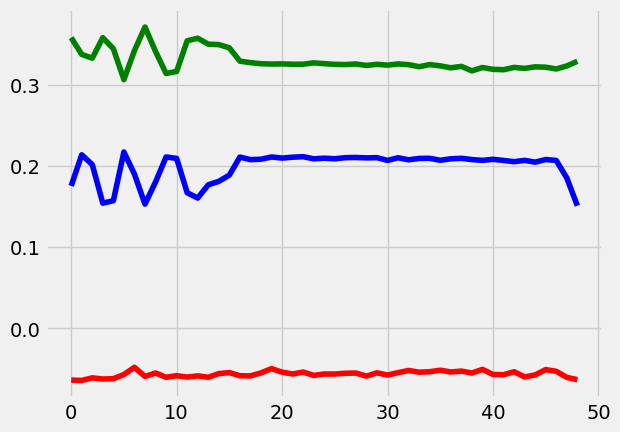

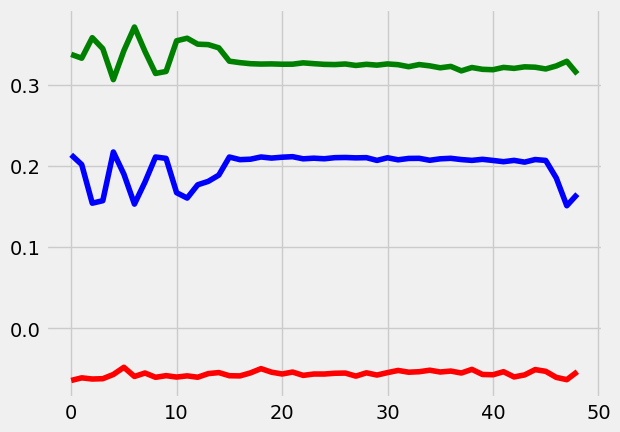

In [5]:
cap = cv2.VideoCapture(0)  # Change the argument to the appropriate camera index
idf = 0
y_coord = []
x_coord = []
z_coord = []
plt.close()
fig = plt.figure()
plt.grid(True)
plt.ion()  #interactive mode on
plt.xlabel('Time'),
plt.ylabel('Y coordinate')

plt.title('Index Finger Coordinate Against Time')

while True:
    ret, frame = cap.read()
    if not ret:
        break
    y_coord, x_coord, z_coord = process_hand_landmarks(frame, y_coord, x_coord, z_coord)
    # if(idf>50):
    #     gsums.append(green)

    idf += 1

    if(idf > 0):

        plt.clf()
        plt.plot(x_coord[-50:-1], 'g')
        plt.plot(z_coord[-50:-1], 'r')
        plt.plot(y_coord[-50:-1], 'b')
        # plt.ylim(0.2, 0.5)
        plt.pause(0.001)
        plt.ioff()

    # cv2.namedWindow('Hand Gestures', cv2.WINDOW_NORMAL)
    # cv2.resizeWindow('Hand Gestures', 540, 604)
    cv2.imshow('Hand Gestures', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

plt.close()
cap.release()
cv2.destroyAllWindows()
